# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$d_wQ = d_w[(y-Xw)^T(y-Xw)] = d_w[(y-Xw)^T](y-Xw) + (y-Xw)^Td_w[(y-Xw)] = \\ 
= d_w[(-Xw)^T](y-Xw) - (y-Xw)^TXdw = -dw^TX^T(y-Xw) - (y-Xw)^TXdw = \\
= -(y-Xw)^TXdw-(y-Xw)^TXdw = -2(y-Xw)^TXdw = 2(Xw-y)^TXdw = 2(X^TXw-X^Ty)dw$

$$Q(w) = d_w(\dfrac{1}{\ell} (y - Xw)^T( y - Xw)) = \dfrac{2}{\ell}(X^TXw-X^Ty)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from descents import get_descent
from linear_regression import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

# for descent_name in ['full','stochastic', 'momentum', 'adam']:
for descent_name in ['full']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

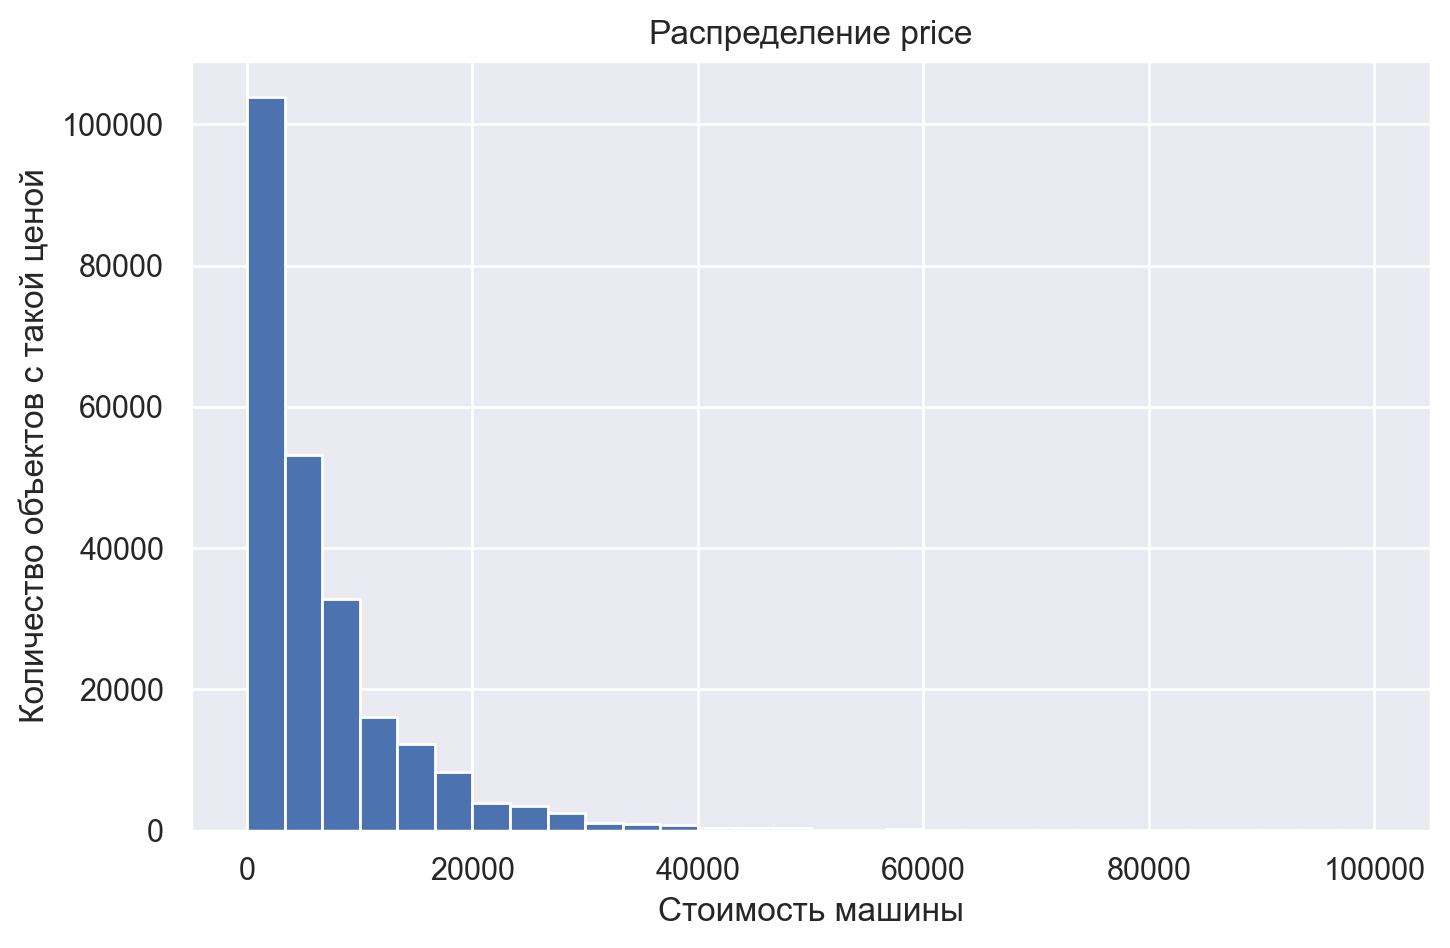

In [9]:
plt.hist(data['price'],bins = 30)
plt.xlabel('Стоимость машины')
plt.ylabel('Количество объектов с такой ценой')
plt.title('Распределение price');

In [10]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


In [11]:
data_wo_outliers = data.drop(data[data['price']>data['price'].quantile(0.99)].index)
data_wo_outliers['log_price'] = np.log1p(data_wo_outliers['price'])
data_wo_outliers = data_wo_outliers.drop(data_wo_outliers.query('log_price < 6').index)

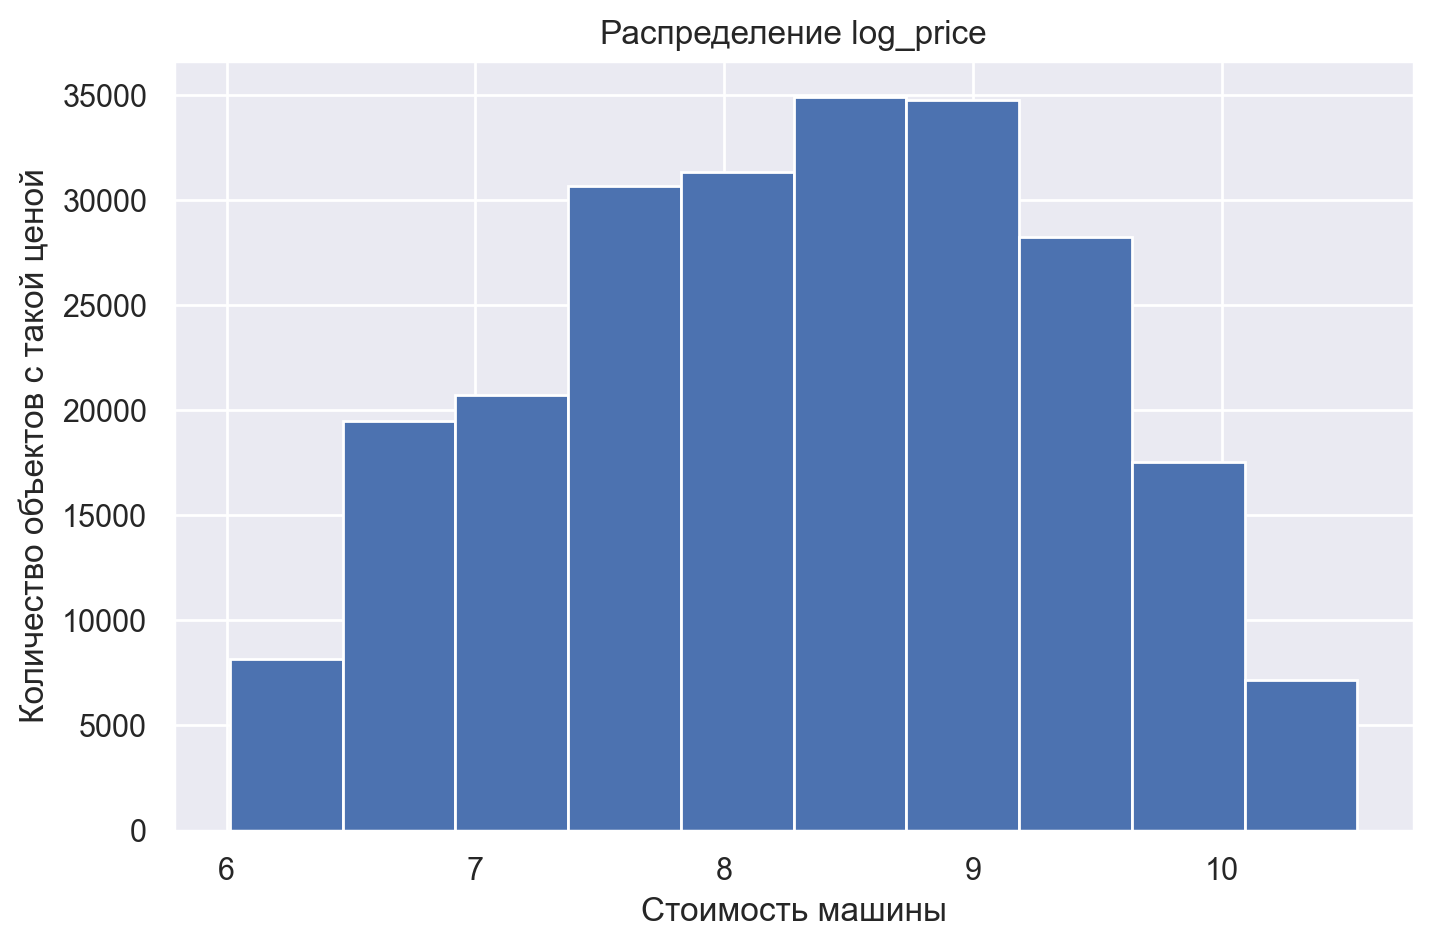

In [12]:
plt.hist(data_wo_outliers['log_price'])
plt.xlabel('Стоимость машины')
plt.ylabel('Количество объектов с такой ценой')
plt.title('Распределение log_price');

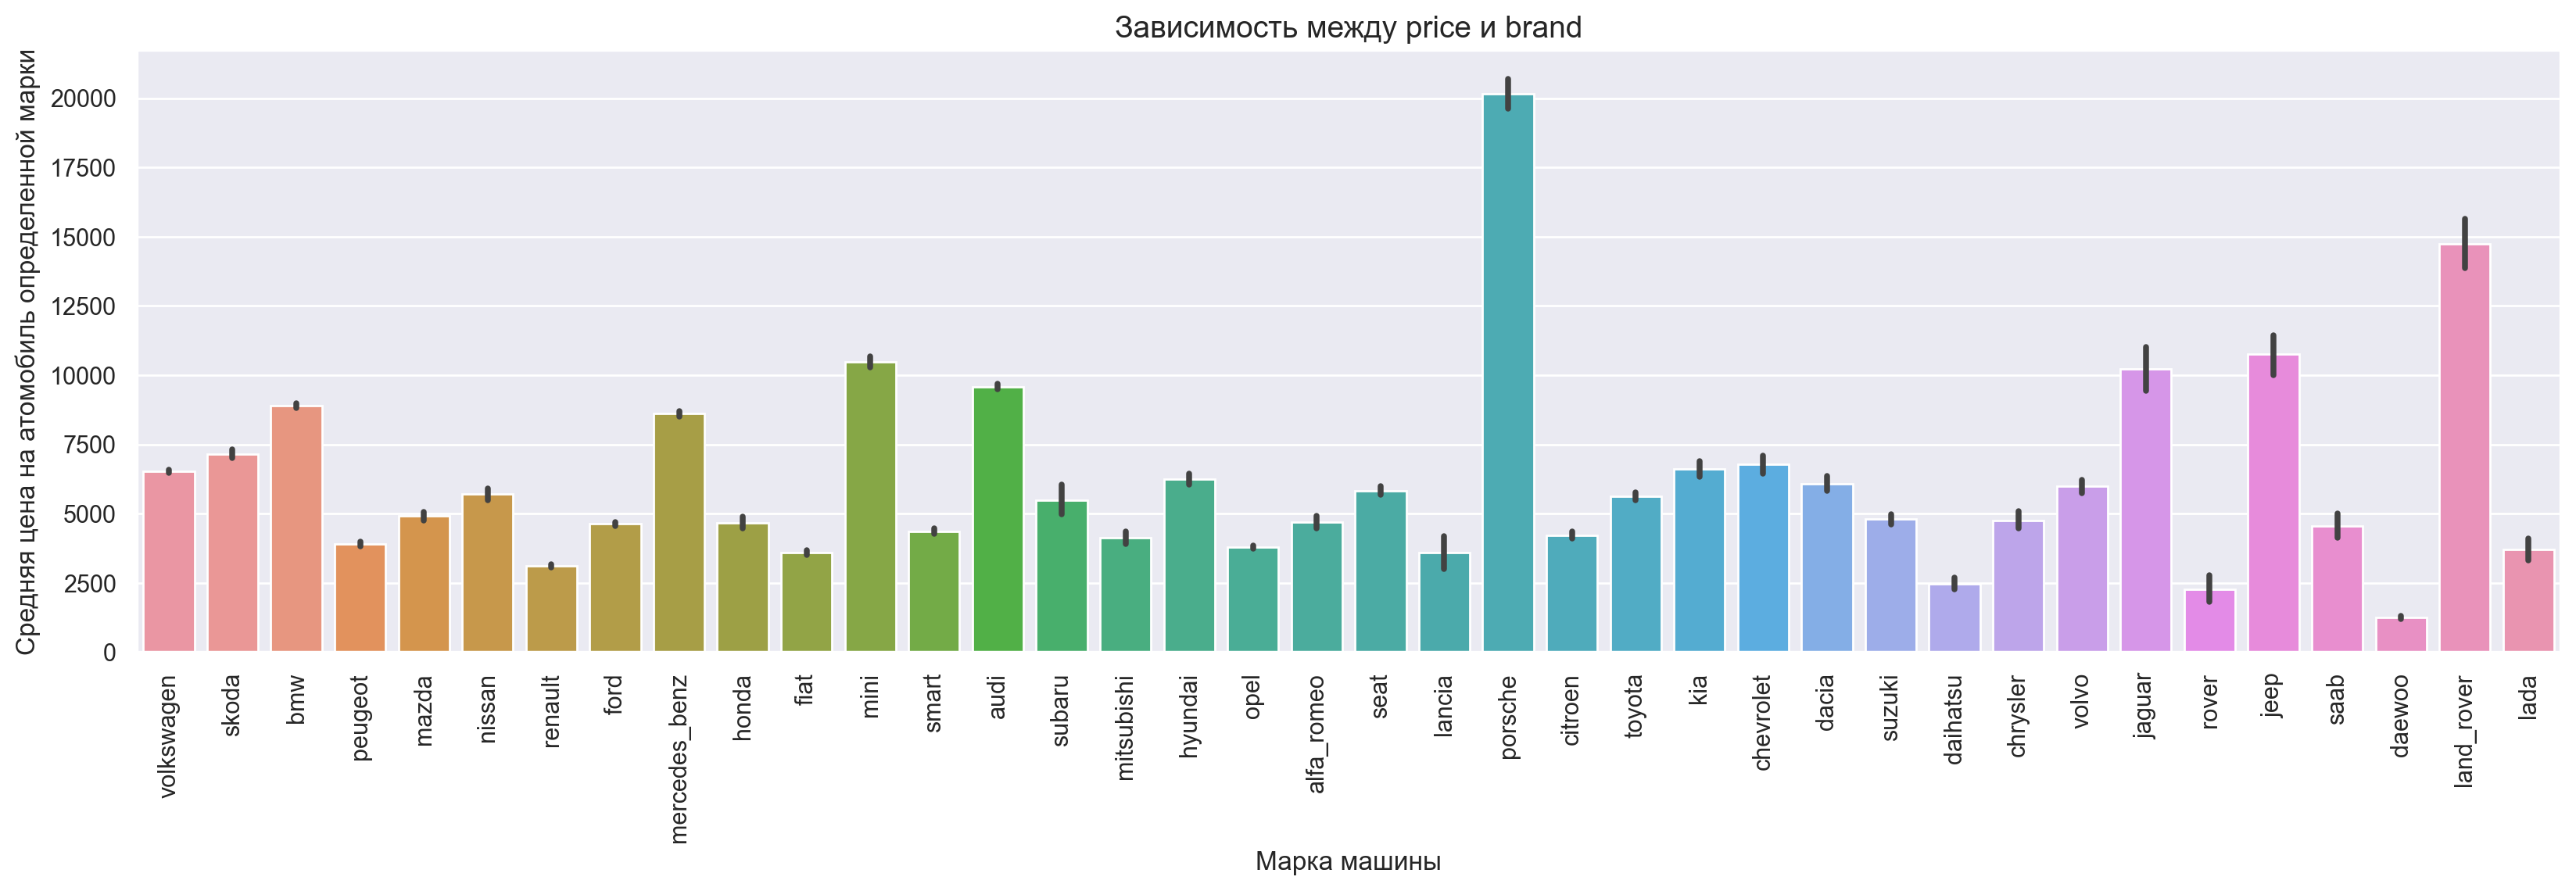

In [13]:
#brand
fig,ax = plt.subplots(figsize = (20,5))
sns.barplot(y = data_wo_outliers['price'],x = data_wo_outliers['brand'],ax = ax)
plt.xlabel('Марка машины',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль определенной марки',fontsize = 12)
plt.title('Зависимость между price и brand',fontsize = 14);

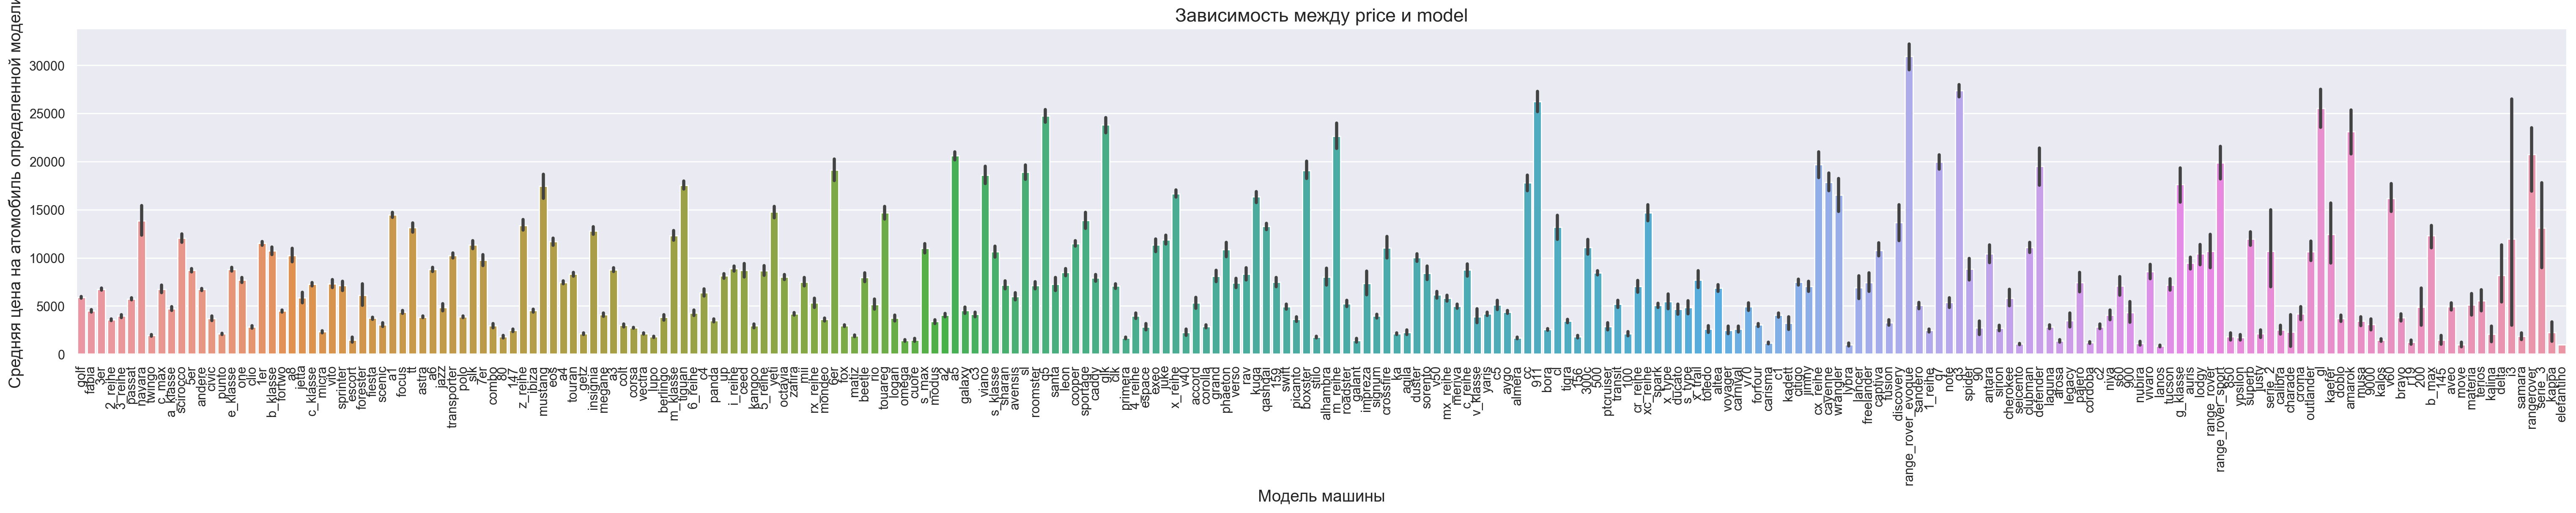

In [14]:
#model
fig,ax = plt.subplots(figsize = (38,5))
sns.barplot(y = data_wo_outliers['price'],x = data_wo_outliers['model'],ax= ax)
plt.xlabel('Модель машины',fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль определенной модели',fontsize = 14)
plt.title('Зависимость между price и model',fontsize = 16);

Text(0.5, 1.0, 'Зависимость между price и vehicleType')

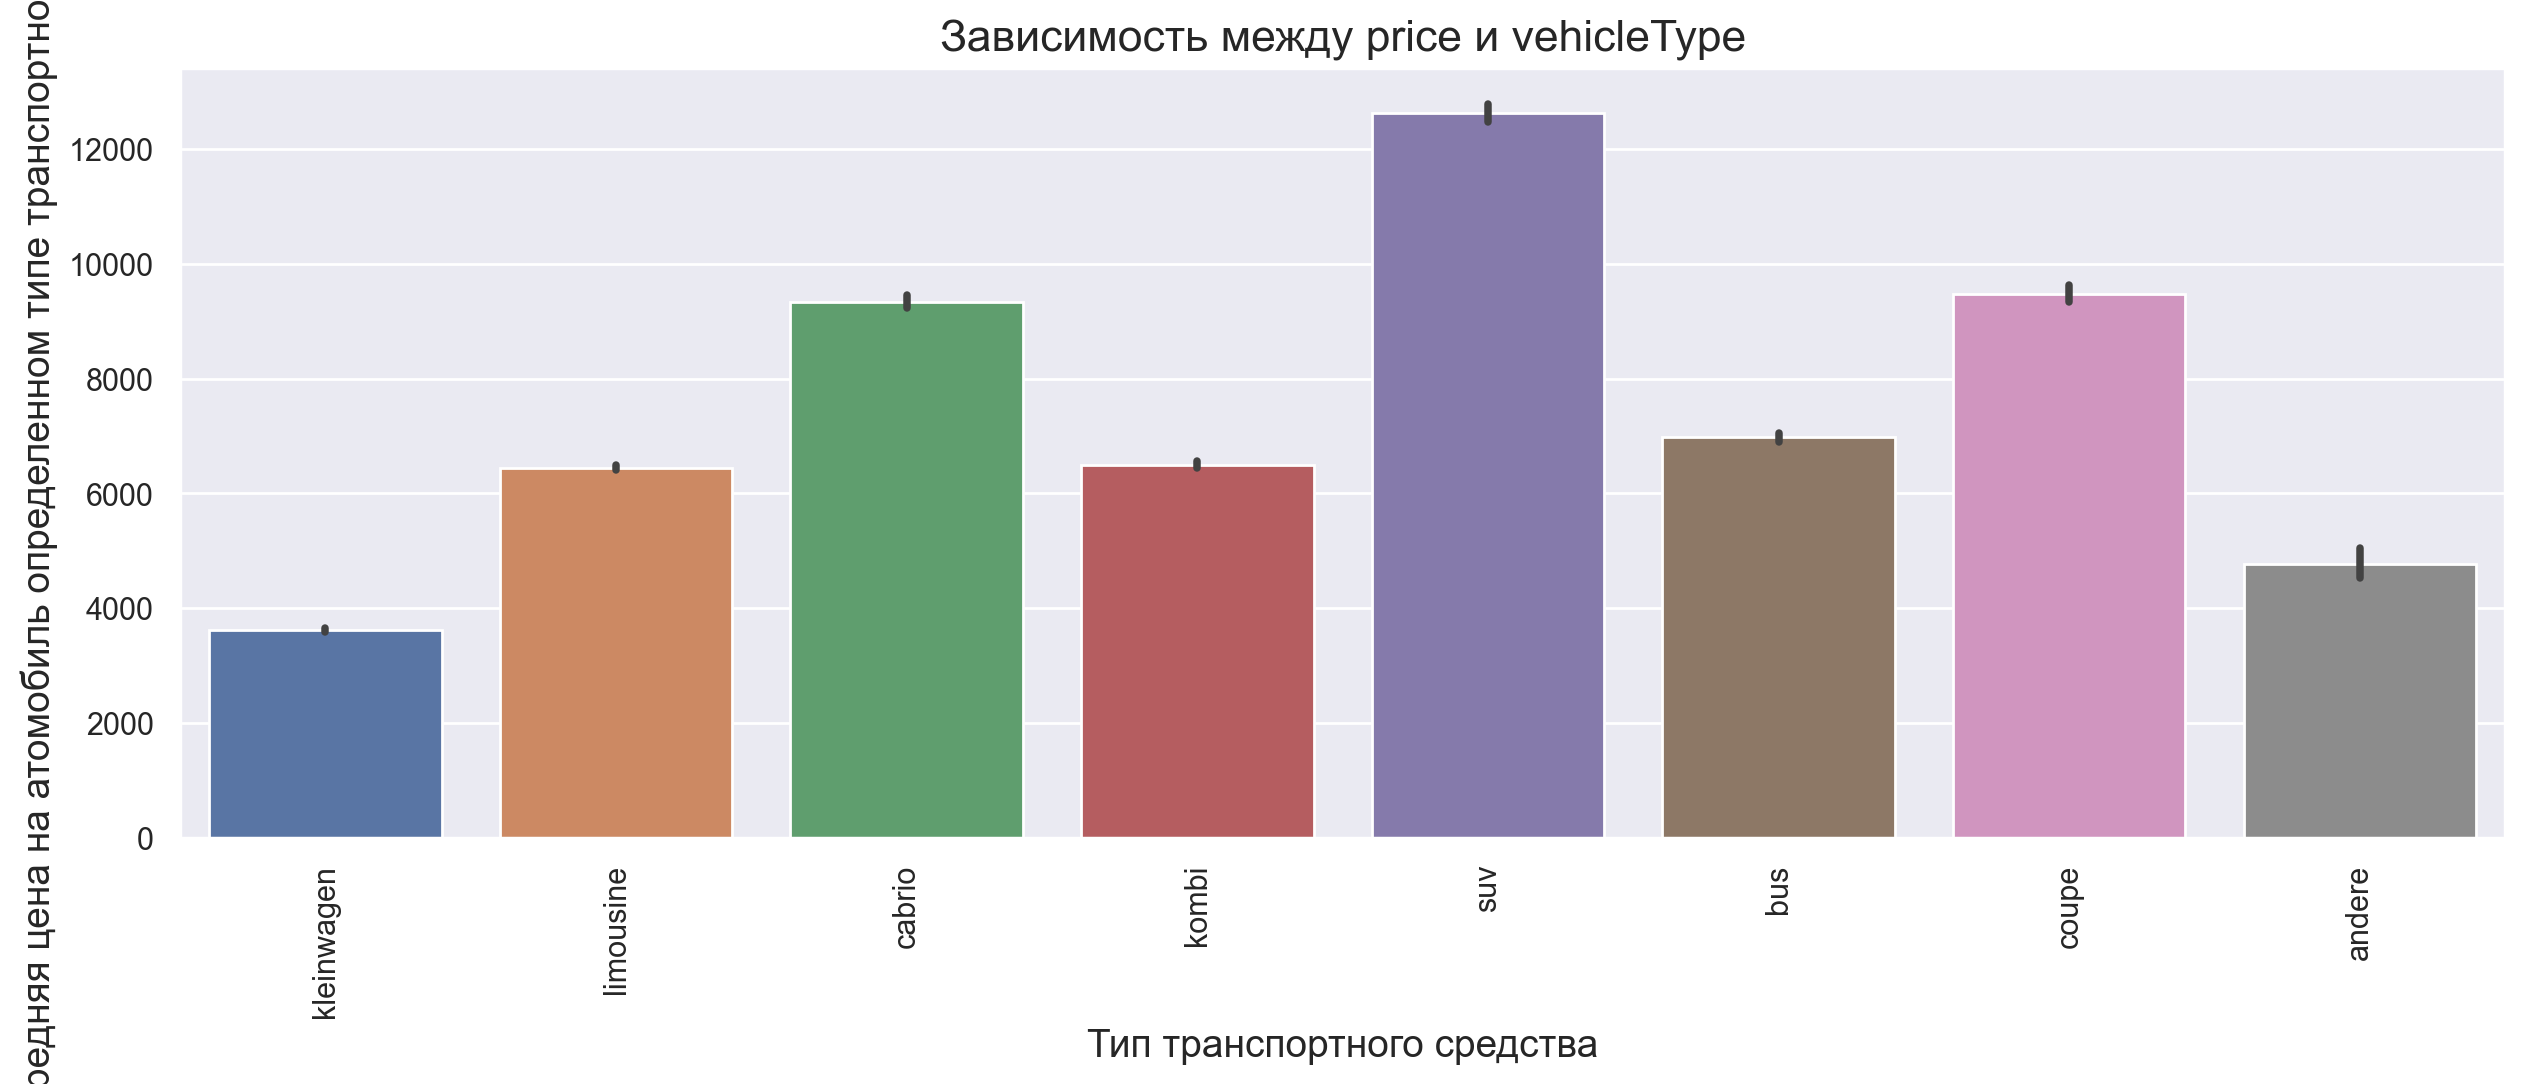

In [15]:
#vehicleType
fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(y = data_wo_outliers['price'],x = data_wo_outliers['vehicleType'],ax= ax)
plt.xlabel('Тип транспортного средства',fontsize = 14)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль определенном типе транспортного средства',fontsize = 14)
plt.title('Зависимость между price и vehicleType',fontsize = 16)

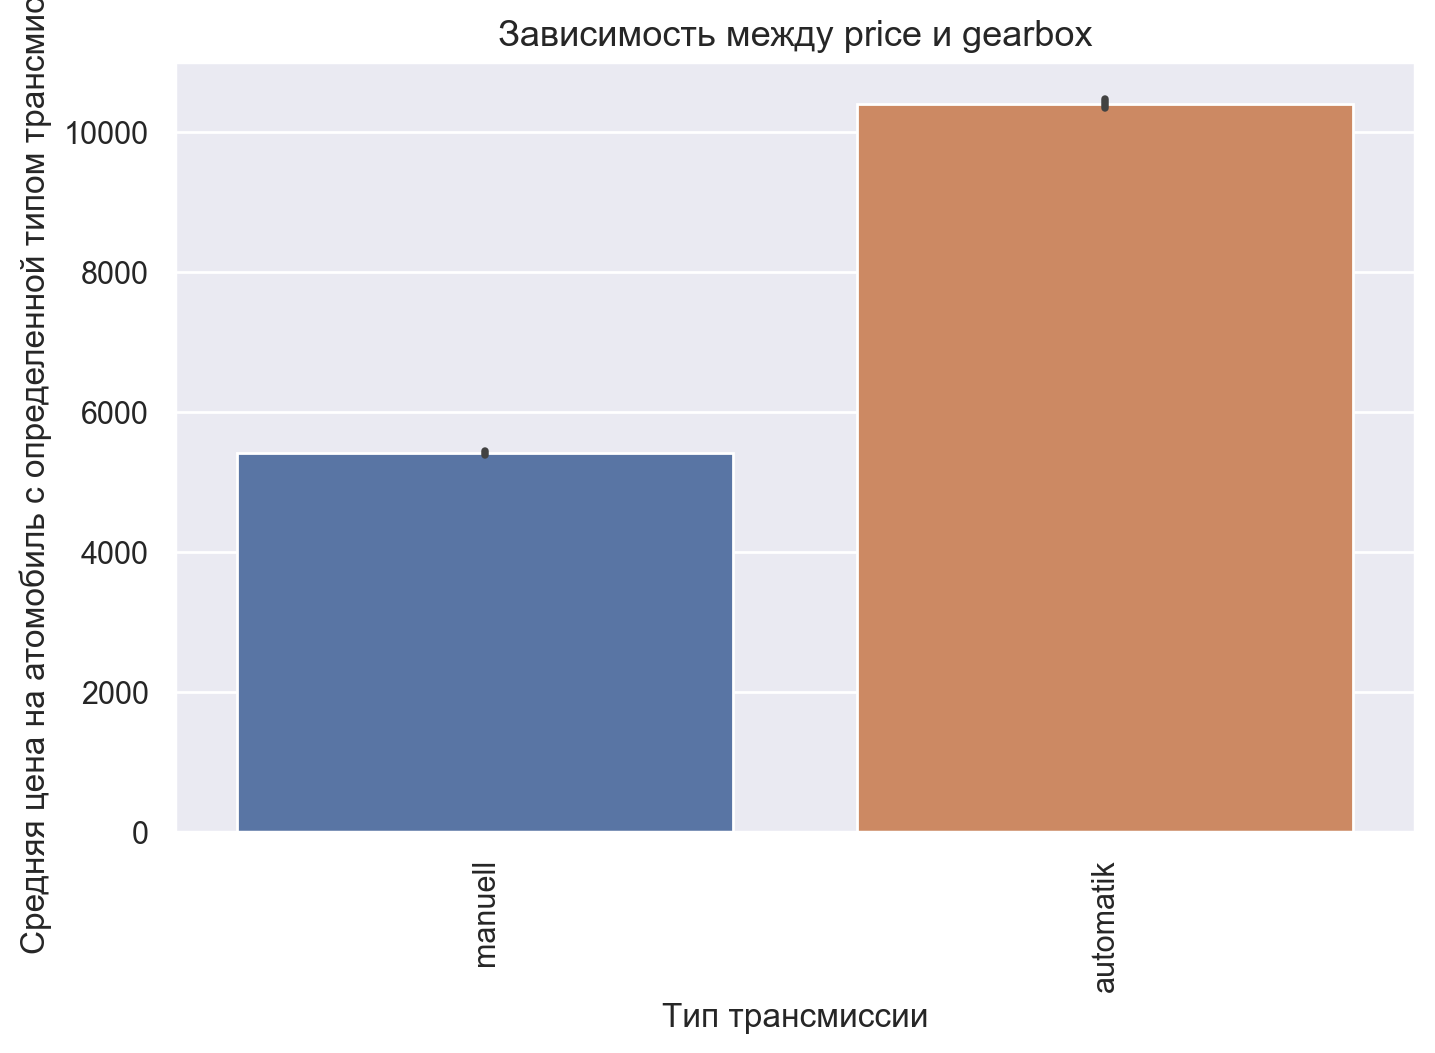

In [16]:
#gearbox
sns.barplot(y = data_wo_outliers['price'],x = data_wo_outliers['gearbox'])
plt.xlabel('Tип трансмисcии',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль c определенной типом трансмисcии',fontsize = 12)
plt.title('Зависимость между price и gearbox',fontsize = 13);

Автоматическая коробка передач дороже

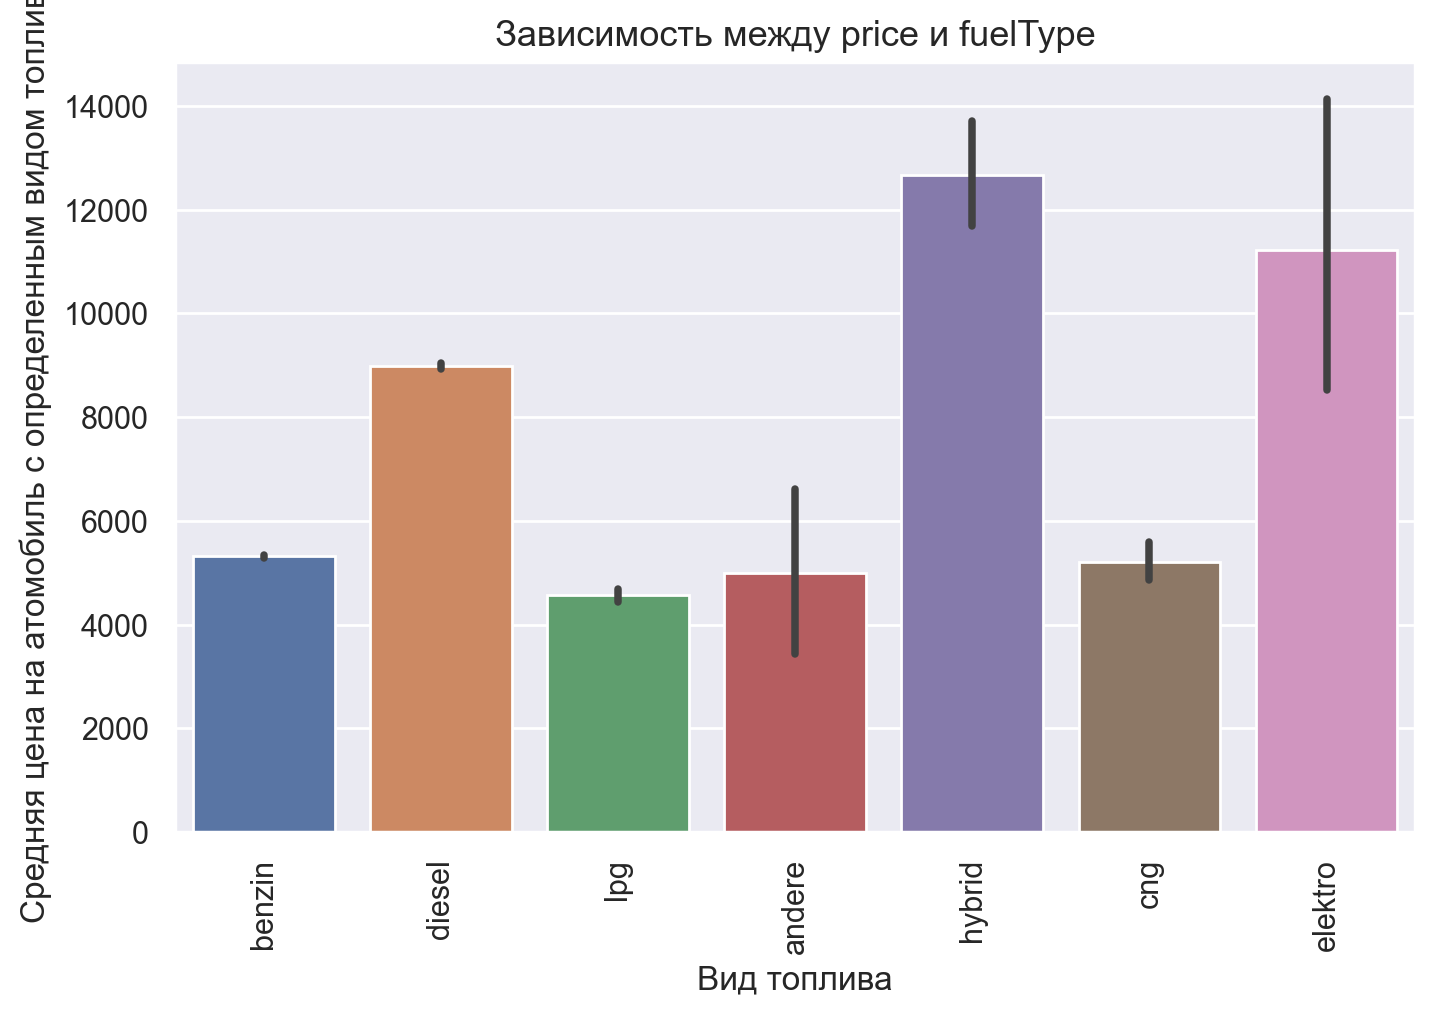

In [17]:
#fuelType
sns.barplot(y = data_wo_outliers['price'],x = data_wo_outliers['fuelType'])
plt.xlabel('Вид топлива',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль c определенным видом топлива',fontsize = 12)
plt.title('Зависимость между price и fuelType',fontsize = 13);

Дизель, гибрид и электричество дороже всего

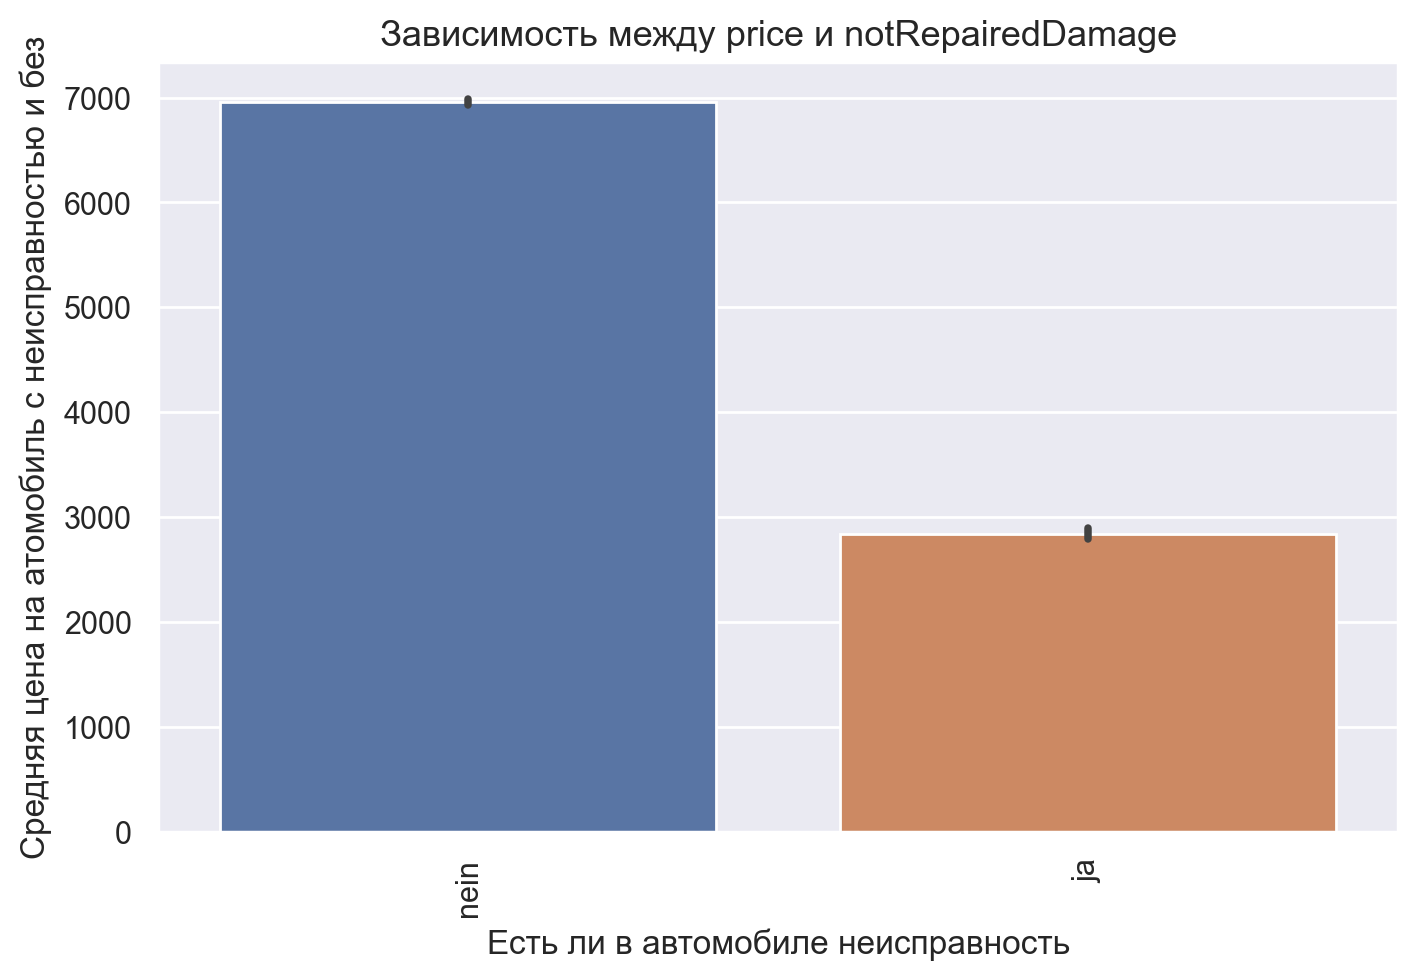

In [18]:
#notRepairedDamage
sns.barplot(y = data_wo_outliers['price'],x = data_wo_outliers['notRepairedDamage'])
plt.xlabel('Есть ли в автомобиле неисправность',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль c неисправностью и без',fontsize = 12)
plt.title('Зависимость между price и notRepairedDamage',fontsize = 13);

В ~ два раза дороже без неисправностей

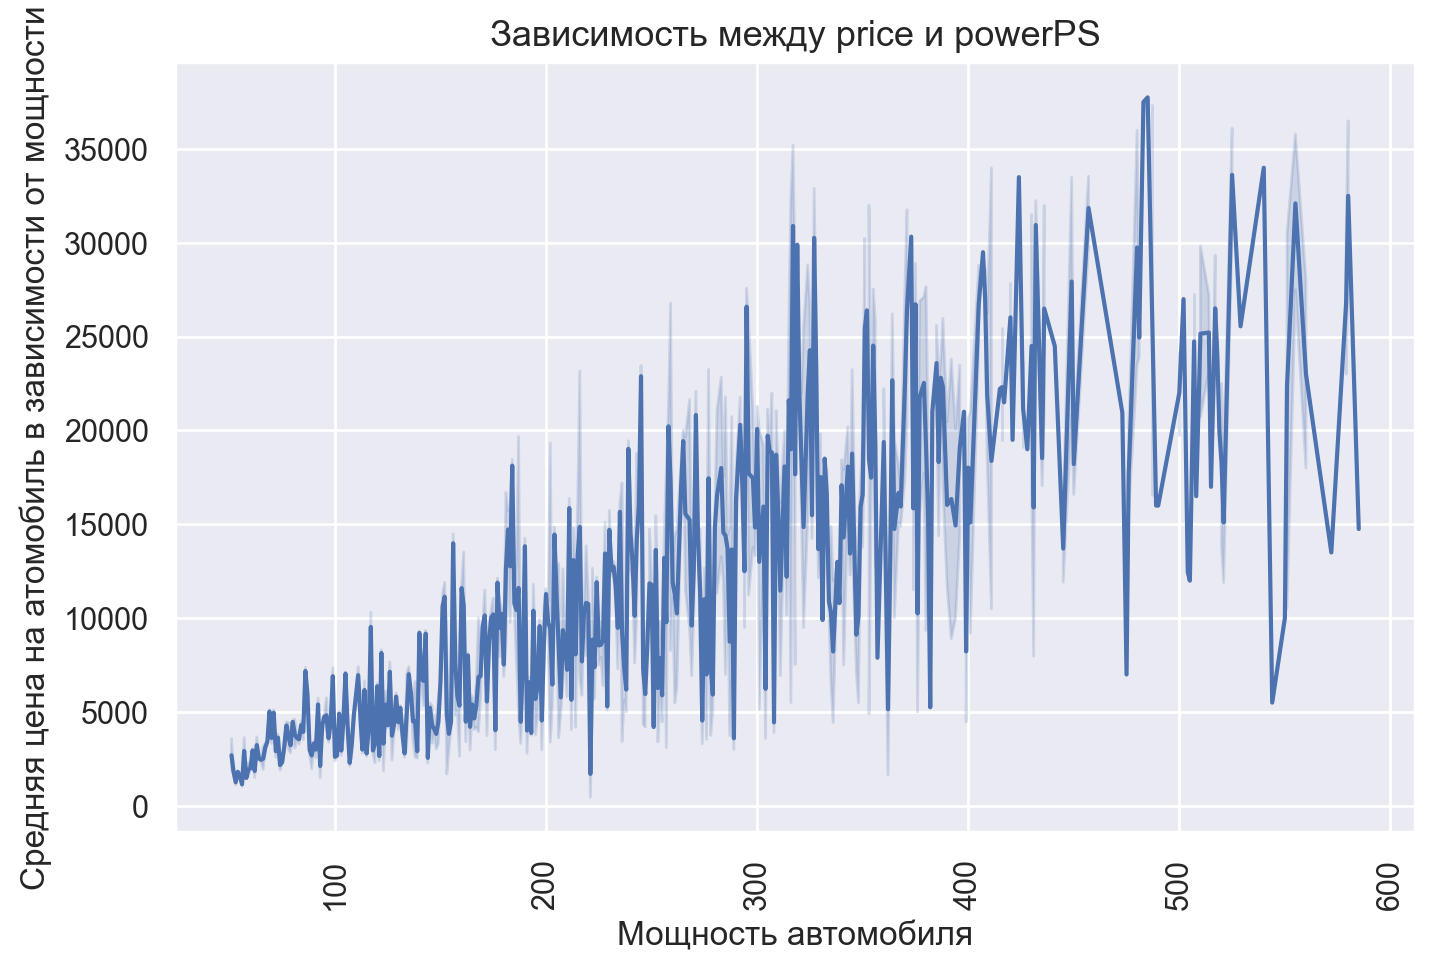

In [19]:
#powerPS
# fig,ax = plt.subplots(figsize = (38,5))
sns.lineplot(y = data_wo_outliers['price'],x = data_wo_outliers['powerPS'])
plt.xlabel('Мощность автомобиля',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль в зависимости от мощности',fontsize = 12)
plt.title('Зависимость между price и powerPS',fontsize = 13);

C ростом мощности растёт цена

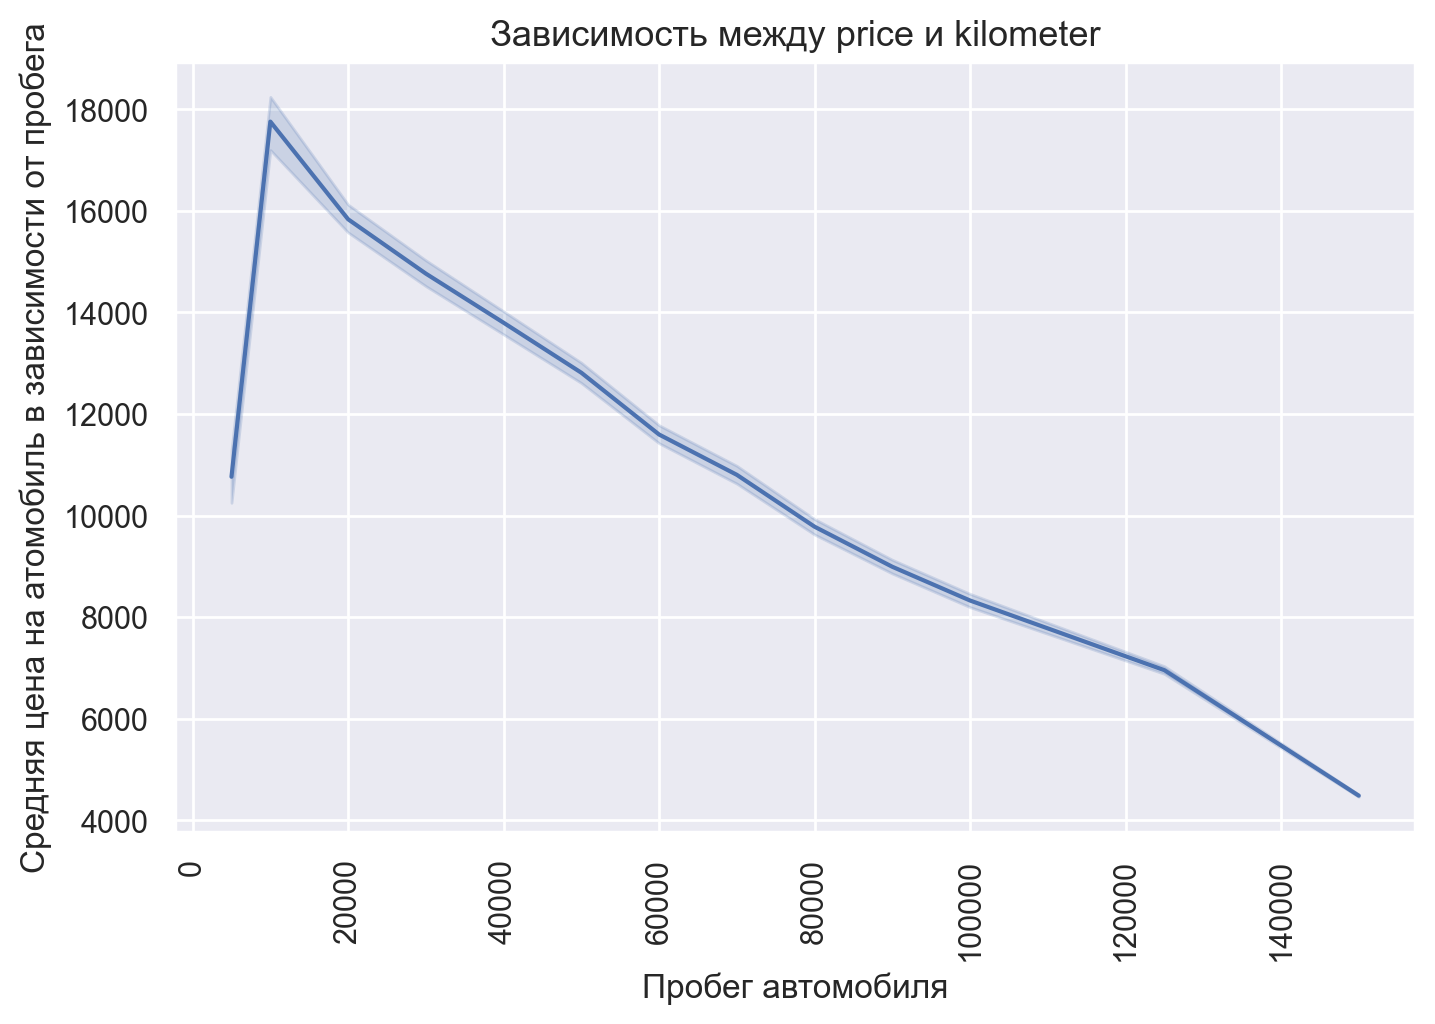

In [20]:
#kilometer
sns.lineplot(y = data_wo_outliers['price'],x = data_wo_outliers['kilometer'])
plt.xlabel('Пробег автомобиля',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль в зависимости от пробега',fontsize = 12)
plt.title('Зависимость между price и kilometer',fontsize = 13);

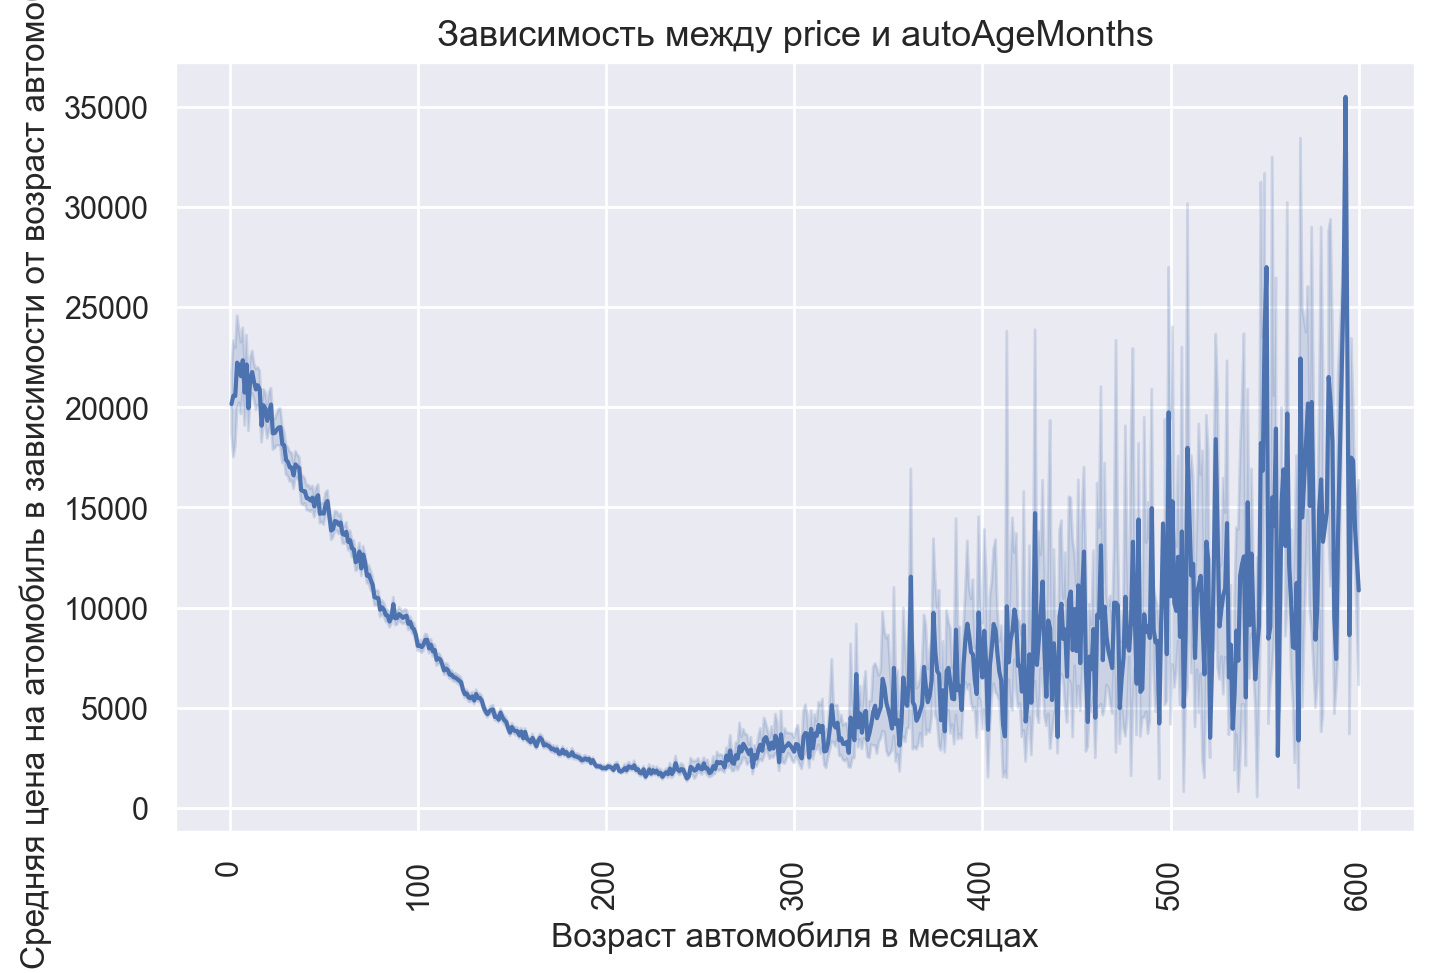

In [21]:
# fig,ax = plt.subplots(figsize = (38,5))
sns.lineplot(y = data_wo_outliers['price'],x = data_wo_outliers['autoAgeMonths'])
plt.xlabel('Возраст автомобиля в месяцах',fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена на атомобиль в зависимости от возраст автомобиля',fontsize = 12)
plt.title('Зависимость между price и autoAgeMonths',fontsize = 13);

После 20 лет дорожает

In [22]:
data_wo_outliers['kilometer_plus'] = data_wo_outliers['kilometer'].where(data_wo_outliers['kilometer']<10000, 0)
data_wo_outliers['kilometer_minus'] = data_wo_outliers['kilometer'].where(data_wo_outliers['kilometer']>=10000, 0)
data_wo_outliers['autoAgeMonths_plus'] = data_wo_outliers['autoAgeMonths'].where(data_wo_outliers['autoAgeMonths']>240, 0)
data_wo_outliers['autoAgeMonths_minus'] = data_wo_outliers['autoAgeMonths'].where(data_wo_outliers['autoAgeMonths']<=240, 0)

In [23]:
data_wo_outliers.dtypes

brand                   object
model                   object
vehicleType             object
gearbox                 object
fuelType                object
notRepairedDamage       object
powerPS                  int64
kilometer                int64
autoAgeMonths            int64
price                    int64
log_price              float64
kilometer_plus           int64
kilometer_minus          int64
autoAgeMonths_plus       int64
autoAgeMonths_minus      int64
dtype: object

In [24]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage'] 
numeric = ['powerPS', 'kilometer_plus', 'kilometer_minus', 'autoAgeMonths_plus', 'autoAgeMonths_minus']
other = []

# YOUR CODE (EDA):

In [25]:
data_wo_outliers['bias'] = 1
other += ['bias']

x = data_wo_outliers[categorical + numeric + other]
y = data_wo_outliers['price']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
# YOUR CODE (data split into train/val/test):
(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(x,y,test_size = 0.1,random_state = 42)

(X_train,
 X_valid,
 y_train,
 y_valid) = train_test_split(X_train,y_train,test_size = 0.1,random_state = 42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [28]:
from sklearn.metrics import r2_score
import itertools
from tqdm import tqdm

In [29]:

X_train = pd.DataFrame(data = X_train.todense())
X_test = pd.DataFrame(data = X_test.todense())
X_valid = pd.DataFrame(data = X_valid.todense())

In [30]:
dimension_compare = X_valid.shape[1]

In [31]:
# dimension_compare = X_valid.shape[1]
# compare_approach = []

# counter = 0
# for name, lambda_ in tqdm(itertools.product(['stochastic', 'momentum', 'adam', 'full'], np.logspace(-1, -6, 3))):
#     descent_config = {
#         'descent_name': name,
#         'kwargs': {
#             'dimension': dimension_compare,
#             'lambda_': lambda_
#         }
#     }

#     regression = LinearRegression(descent_config=descent_config)
#     regression = regression.fit(X_train, y_train)
#     train_loss = regression.calc_loss(X_train, y_train)
#     valid_loss = regression.calc_loss(X_valid, y_valid)
#     test_loss = regression.calc_loss(X_test, y_test)
#     r2_score_valid = r2_score(y_valid, regression.predict(X_valid))
#     last_iter = 300 - regression.max_iter
#     compare_approach.append([name, train_loss, valid_loss, test_loss, lambda_, r2_score_valid, last_iter])
#     counter += 1

# compare_approach = pd.DataFrame(compare_approach, columns=['name', 'train_score', 'valid_score', 'test_score', 'lambda', 'r2_valid', 'last_iter'])

In [32]:
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from sklearn.metrics import r2_score
import itertools

def process_configuration(config):
    name, lambda_, dimension_compare = config
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': dimension_compare,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    train_loss = regression.calc_loss(X_train, y_train)
    valid_loss = regression.calc_loss(X_valid, y_valid)
    test_loss = regression.calc_loss(X_test, y_test)
    r2_score_valid = r2_score(y_valid, regression.predict(X_valid))
    last_iter = 300 - regression.max_iter
    return [name, train_loss, valid_loss, test_loss, lambda_, r2_score_valid, last_iter]

# Set up parameters
lambda_values = np.logspace(-1, -6, 3)
descent_names = ['stochastic', 'momentum', 'adam', 'full']
dimension_compare = X_valid.shape[1]
configurations = list(itertools.product(descent_names, lambda_values, [dimension_compare]))

# Set up thread pool
max_threads = 15  # Adjust this based on your system

# Use ThreadPoolExecutor for parallel processing with tqdm progress tracking
with ThreadPoolExecutor(max_threads) as executor, tqdm(total=len(configurations)) as pbar:
    compare_approach = []

    # Submit tasks
    futures = [executor.submit(process_configuration, config) for config in configurations]

    # Collect results as they complete
    for future in as_completed(futures):
        result = future.result()
        compare_approach.append(result)
        pbar.update(1)

# Convert results to DataFrame
compare_approach = pd.DataFrame(compare_approach, columns=['name', 'train_score', 'valid_score', 'test_score', 'lambda', 'r2_valid', 'last_iter'])


100%|██████████| 12/12 [06:31<00:00, 32.61s/it]


In [33]:
compare_approach

,name,train_score,valid_score,test_score,lambda,r2_valid,last_iter
0,adam,8.757654e+07,8.592056e+07,8.814387e+07,0.000001,-1.006095,1
1,adam,8.756940e+07,8.591344e+07,8.813657e+07,0.000316,-1.005998,1
2,stochastic,8.757347e+07,8.591671e+07,8.814123e+07,0.000001,-1.005990,6
3,full,8.756848e+07,8.591209e+07,8.813591e+07,0.000001,-1.005851,7
4,stochastic,7.635030e+07,7.329882e+07,7.773715e+07,0.100000,0.719674,300
5,stochastic,8.224899e+07,8.065720e+07,8.280330e+07,0.000316,-0.847923,300
6,momentum,7.568551e+07,7.266725e+07,7.732639e+07,0.100000,0.746669,300
7,momentum,8.738592e+07,8.573243e+07,8.795238e+07,0.000001,-1.000580,300
8,momentum,5.696006e+07,5.560415e+07,5.750482e+07,0.000316,-0.004957,300
9,full,8.217606e+07,8.058671e+07,8.272825e+07,0.000316,-0.848734,300


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [34]:
# loss_histories = {}
# for name, lambda_ in tqdm(zip([ 'stochastic', 'momentum', 'adam','full'],[0.1,0.1,0.1,0.1])):
#     descent_config = {
#         'descent_name': name,
#         'kwargs': {
#             'dimension': dimension_compare,
#             'lambda_': lambda_
#         }
#     }

#     regression = LinearRegression(
#         descent_config=descent_config)
#     regression = regression.fit(X_train,y_train)
#     loss_histories[name]= regression.loss_history

In [35]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def compute_loss_history(name, lambda_, dimension_compare):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': dimension_compare,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train)
    return name, regression.loss_history

# Set up parameters
lambda_values = [0.1, 0.1, 0.1, 0.1]
descent_names = ['stochastic', 'momentum', 'adam', 'full']
dimension_compare = X_train.shape[1]
configs = list(zip(descent_names, lambda_values, [dimension_compare] * len(descent_names)))

# Set up thread pool
max_threads = 15  # Adjust this based on your system

# Use ThreadPoolExecutor for parallel processing with tqdm progress tracking
with ThreadPoolExecutor(max_threads) as executor, tqdm(total=len(configs)) as pbar:
    loss_histories = {}

    # Submit tasks
    futures = [executor.submit(compute_loss_history, *config) for config in configs]

    # Collect results as they complete
    for future in as_completed(futures):
        name, loss_history = future.result()
        loss_histories[name] = loss_history
        pbar.update(1)


100%|██████████| 4/4 [03:04<00:00, 46.09s/it] 


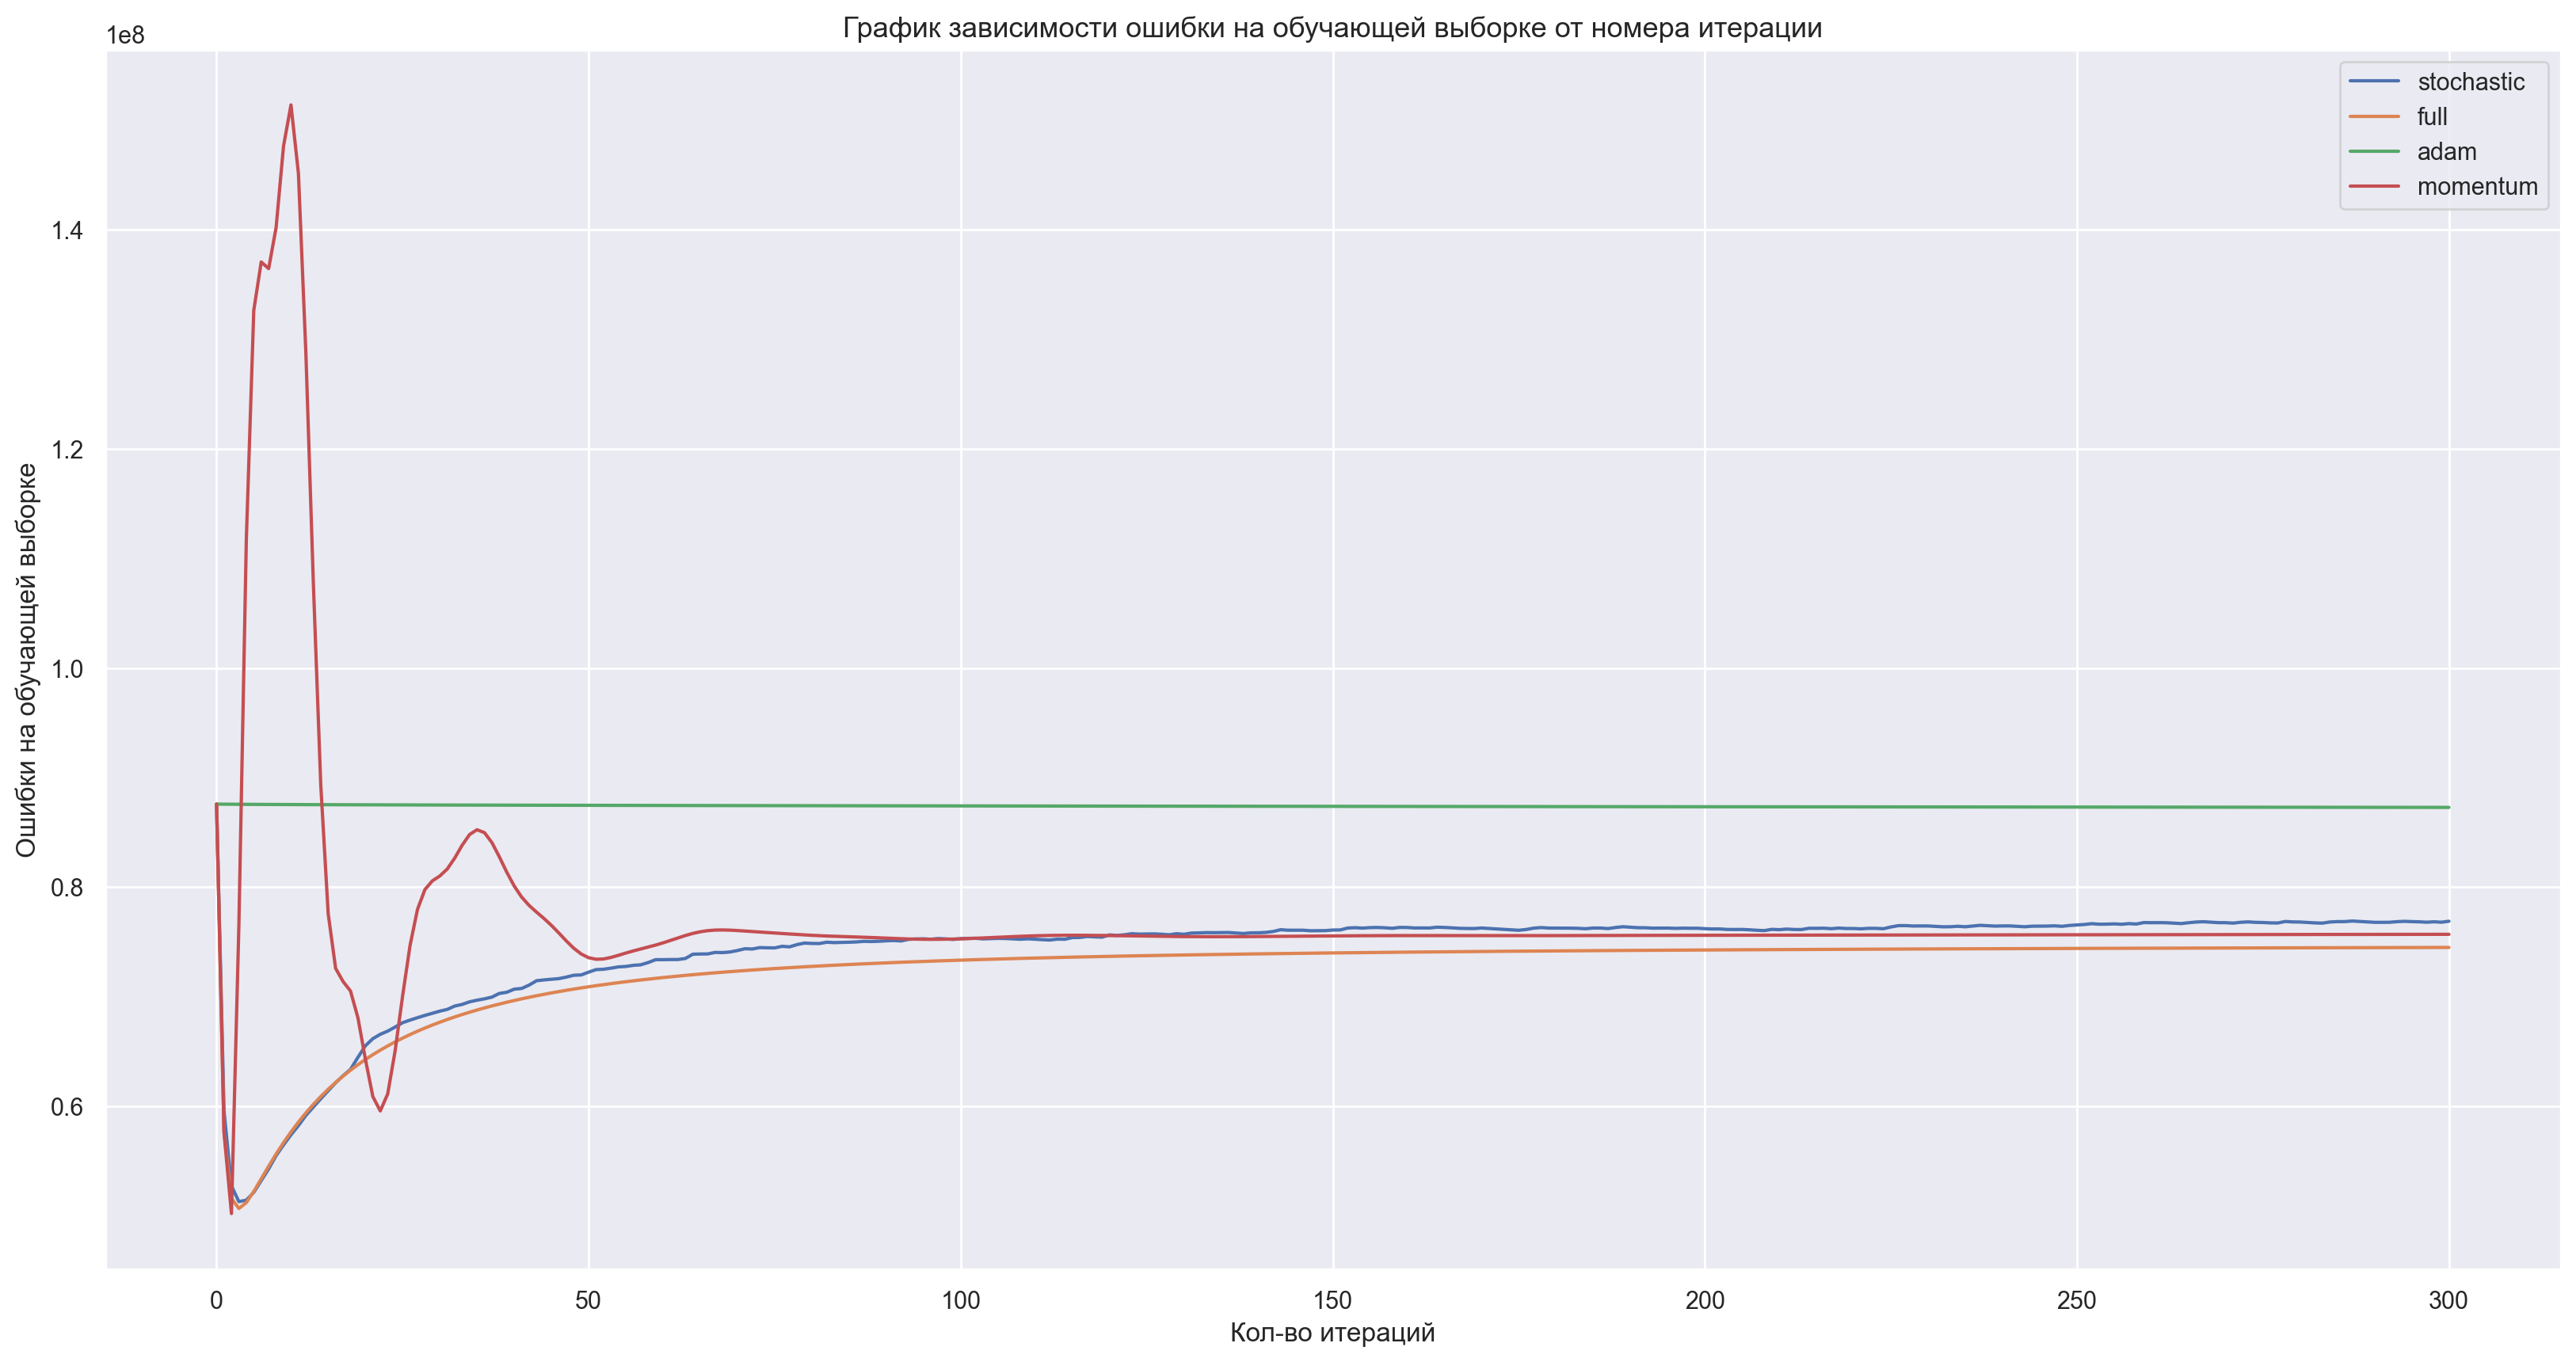

In [36]:
fig, ax = plt.subplots(figsize = (20,10))
for name,line in loss_histories.items():
    ax.plot(line,label= name )
# plt.xlim((0,100))
ax.legend()
plt.xlabel('Кол-во итераций',fontsize = 12)
plt.ylabel('Ошибки на обучающей выборке',fontsize = 12)
plt.title('График зависимости ошибки на обучающей выборке от номера итерации',fontsize = 13);

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [37]:
# import time
# batch_sizes = np.arange(5, 500, 10)
# mean_time = []
# mean_iter = []

# for batch in tqdm(batch_sizes):
#     seq_time = []
#     seq_iter = []
    
#     descent_config = {
#         'descent_name': 'stochastic',
#         'kwargs': {
#             'dimension': dimension_compare,
#             'batch_size': batch
#         }
#     }

#     regression = LinearRegression(descent_config=descent_config)
    
#     for i in range(2):
#         start = time.time()
#         regression.fit(X_train, y_train)
#         seq_time.append(time.time() - start)
#         seq_iter.append(300 - regression.max_iter)
    
#     mean_time.append(np.mean(seq_time))
#     mean_iter.append(np.mean(seq_iter))

In [38]:
import time
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

# Define a function to perform regression fitting
def fit_regression(batch_size):
    seq_time = []
    seq_iter = []

    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': dimension_compare,
            'batch_size': batch_size
        }
    }

    regression = LinearRegression(descent_config=descent_config)

    for i in range(2):
        start = time.time()
        regression.fit(X_train, y_train)
        seq_time.append(time.time() - start)
        seq_iter.append(300 - regression.max_iter)

    return np.mean(seq_time), np.mean(seq_iter)

# Set up batch sizes and thread pool
batch_sizes = np.arange(5, 500, 10)
mean_time = []
mean_iter = []
max_threads = 10  # Adjust this based on your system

# Use ThreadPoolExecutor to parallelize the regression fitting
with ThreadPoolExecutor(max_threads) as executor, tqdm(total=len(batch_sizes)) as pbar:
    futures = [executor.submit(fit_regression, batch_size) for batch_size in batch_sizes]

    for future in as_completed(futures):
        mean_time_i, mean_iter_i = future.result()
        mean_time.append(mean_time_i)
        mean_iter.append(mean_iter_i)
        pbar.update(1)


100%|██████████| 50/50 [07:11<00:00,  8.63s/it] 


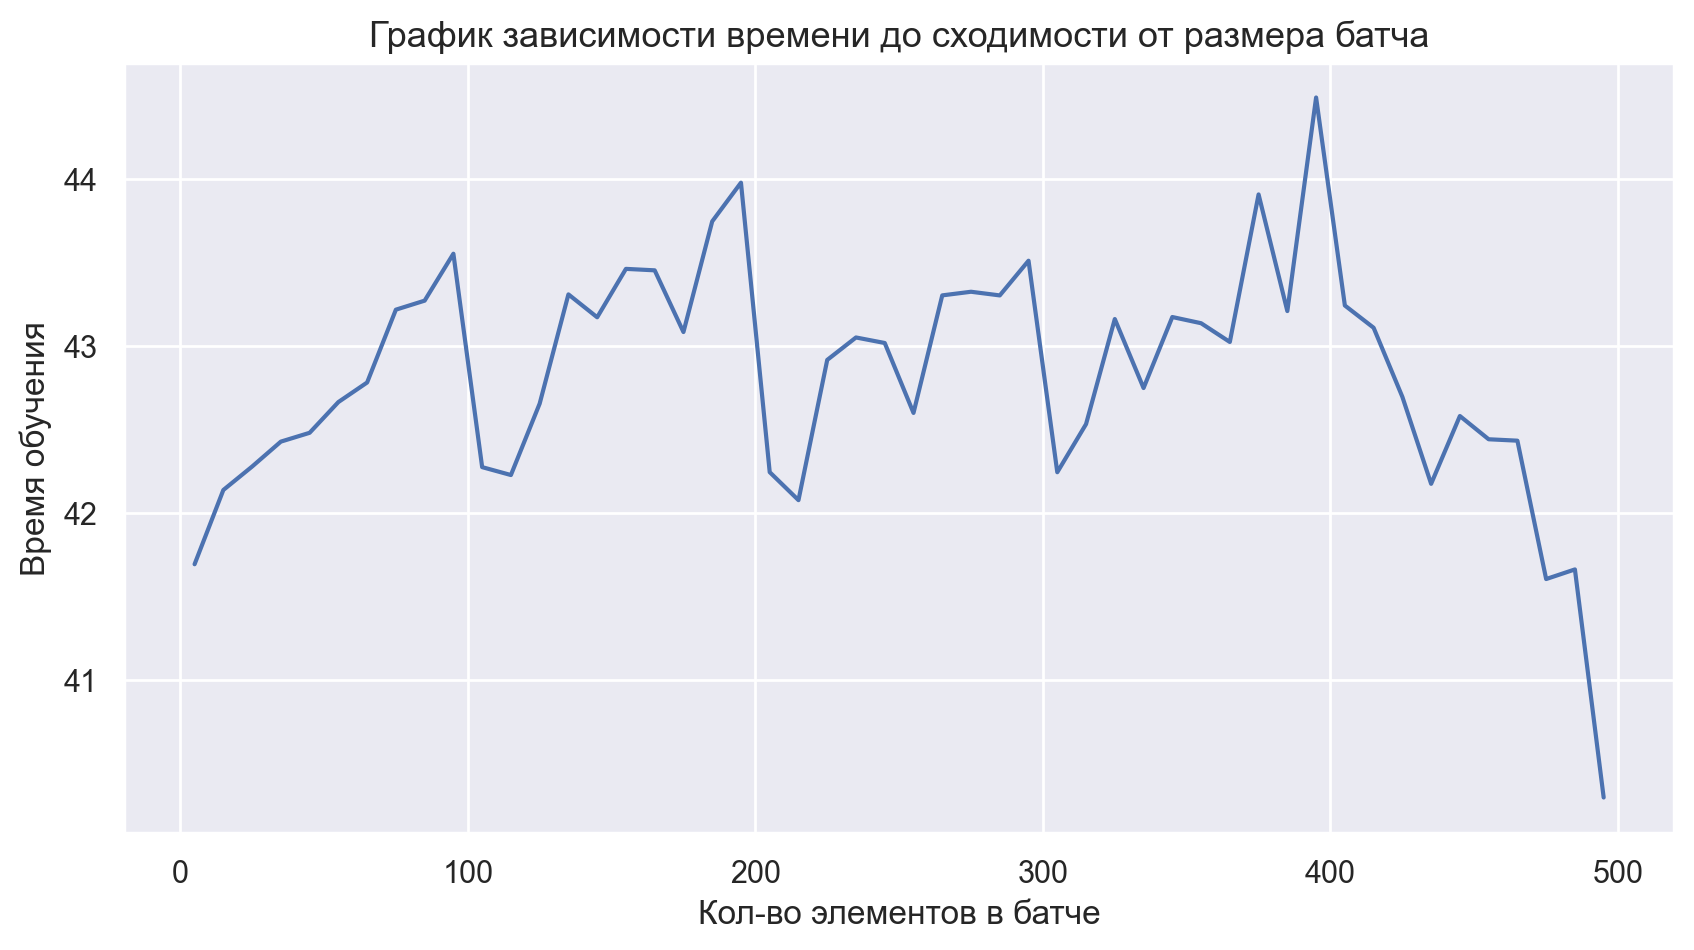

In [39]:
fig,ax = plt.subplots(figsize = (10,5))
sns.lineplot(y = mean_time,x = batch_sizes,ax =ax)
plt.xlabel('Кол-во элементов в батче',fontsize = 12)
plt.ylabel('Время обучения',fontsize = 12)
plt.title('График зависимости времени до сходимости от размера батча',fontsize = 13);

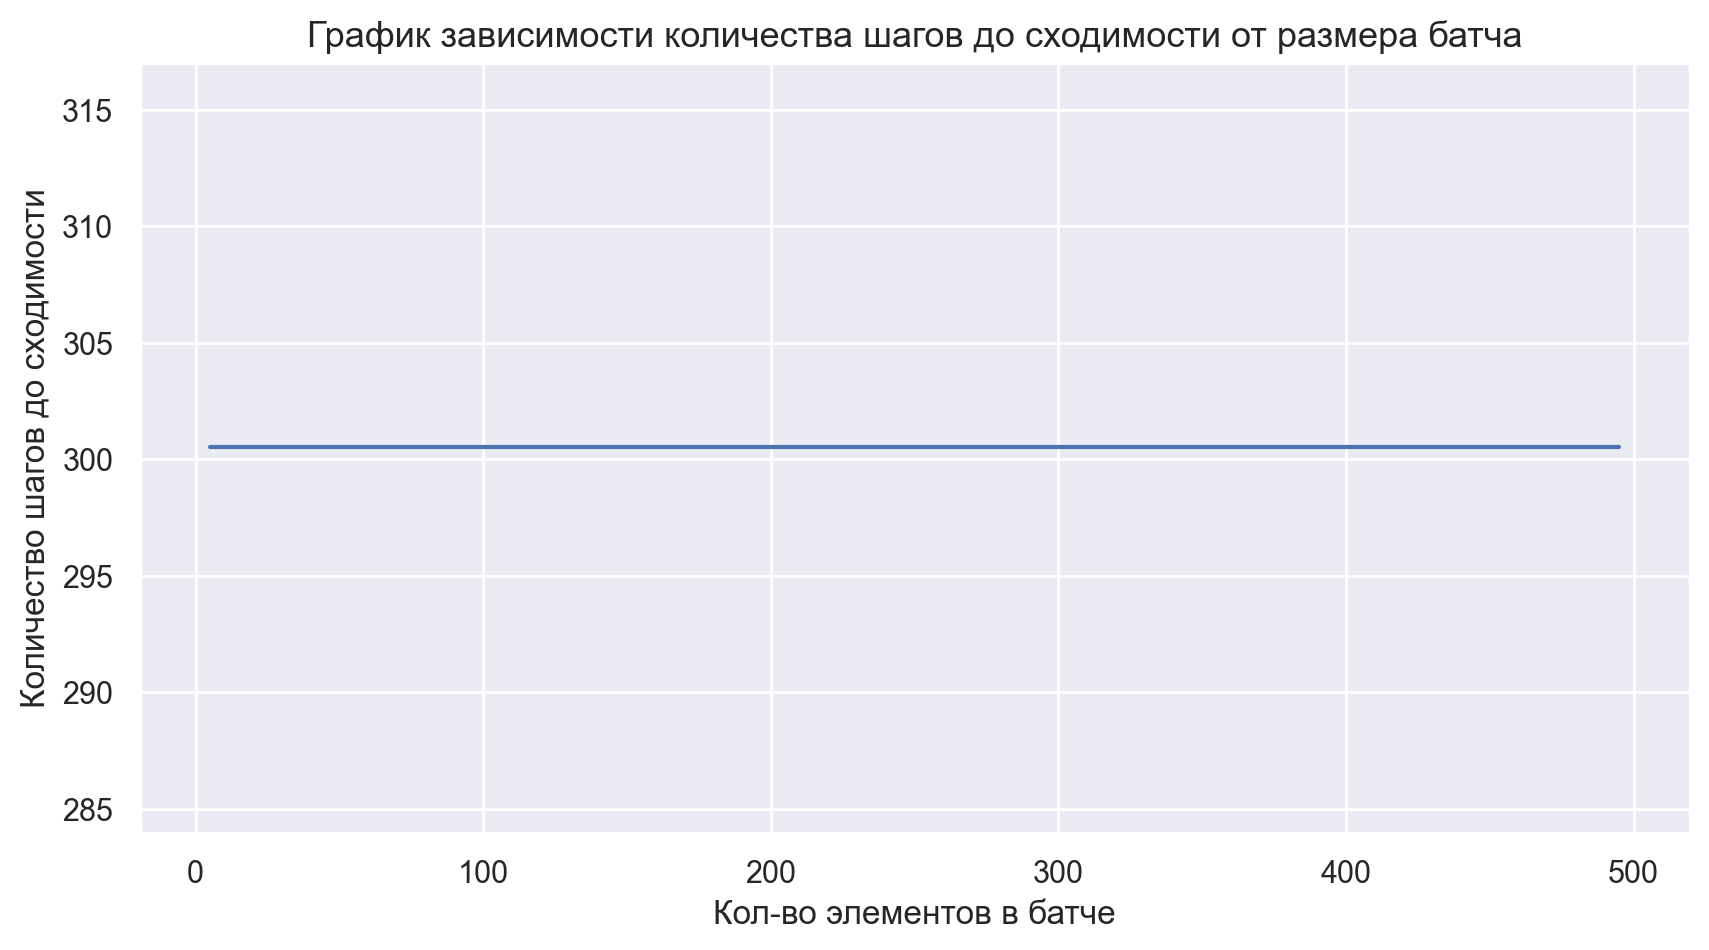

In [40]:
fig,ax = plt.subplots(figsize = (10,5))
sns.lineplot(y = mean_iter,x = batch_sizes,ax =ax)
plt.xlabel('Кол-во элементов в батче',fontsize = 12)
plt.ylabel('Количество шагов до сходимости',fontsize = 12)
plt.title('График зависимости количества шагов до сходимости от размера батча',fontsize = 13);


`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [45]:
demension_compare = X_valid.shape[1]
compare_approach_reg = pd.DataFrame(columns = ['name','train_score','valid_score','test_score',"lambda",'mu','r2_valid','last_iter'])
counter = 0
for name, lambda_,mu in tqdm(itertools.product(['stochastic', 'momentum', 'adam','full'],
                                       np.logspace(-1,-6,3),np.logspace(-1,0,3))):
    descent_config = {
        'regularized': True,
        'descent_name': name,
        'kwargs': {
            'dimension': demension_compare,
            'lambda_': lambda_,
            'mu':mu
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)
    regression = regression.fit(X_train,y_train)
    train_loss = regression.calc_loss(X_train,y_train)
    valid_loss = regression.calc_loss(X_valid,y_valid)
    test_loss = regression.calc_loss(X_test,y_test)
    r2_score_valid = r2_score(y_valid,regression.predict(X_valid))
    last_iter = 300 - regression.max_iter
    compare_approach_reg.loc[counter] = [name,train_loss,valid_loss,test_loss,lambda_,mu,r2_score_valid,last_iter]
    counter += 1

36it [23:45, 39.60s/it]


In [46]:
loss_histiries_re = {}
for name, lambda_ in tqdm(zip([ 'stochastic', 'momentum', 'adam','full'],[0.1,0.1,0.1,0.1])):
    descent_config = {
        'regularized': True,
        'descent_name': name,
        'kwargs': {
            'dimension': demension_compare,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)
    regression = regression.fit(X_train,y_train)
    loss_histiries_re[name]= regression.loss_history

4it [04:10, 62.57s/it]


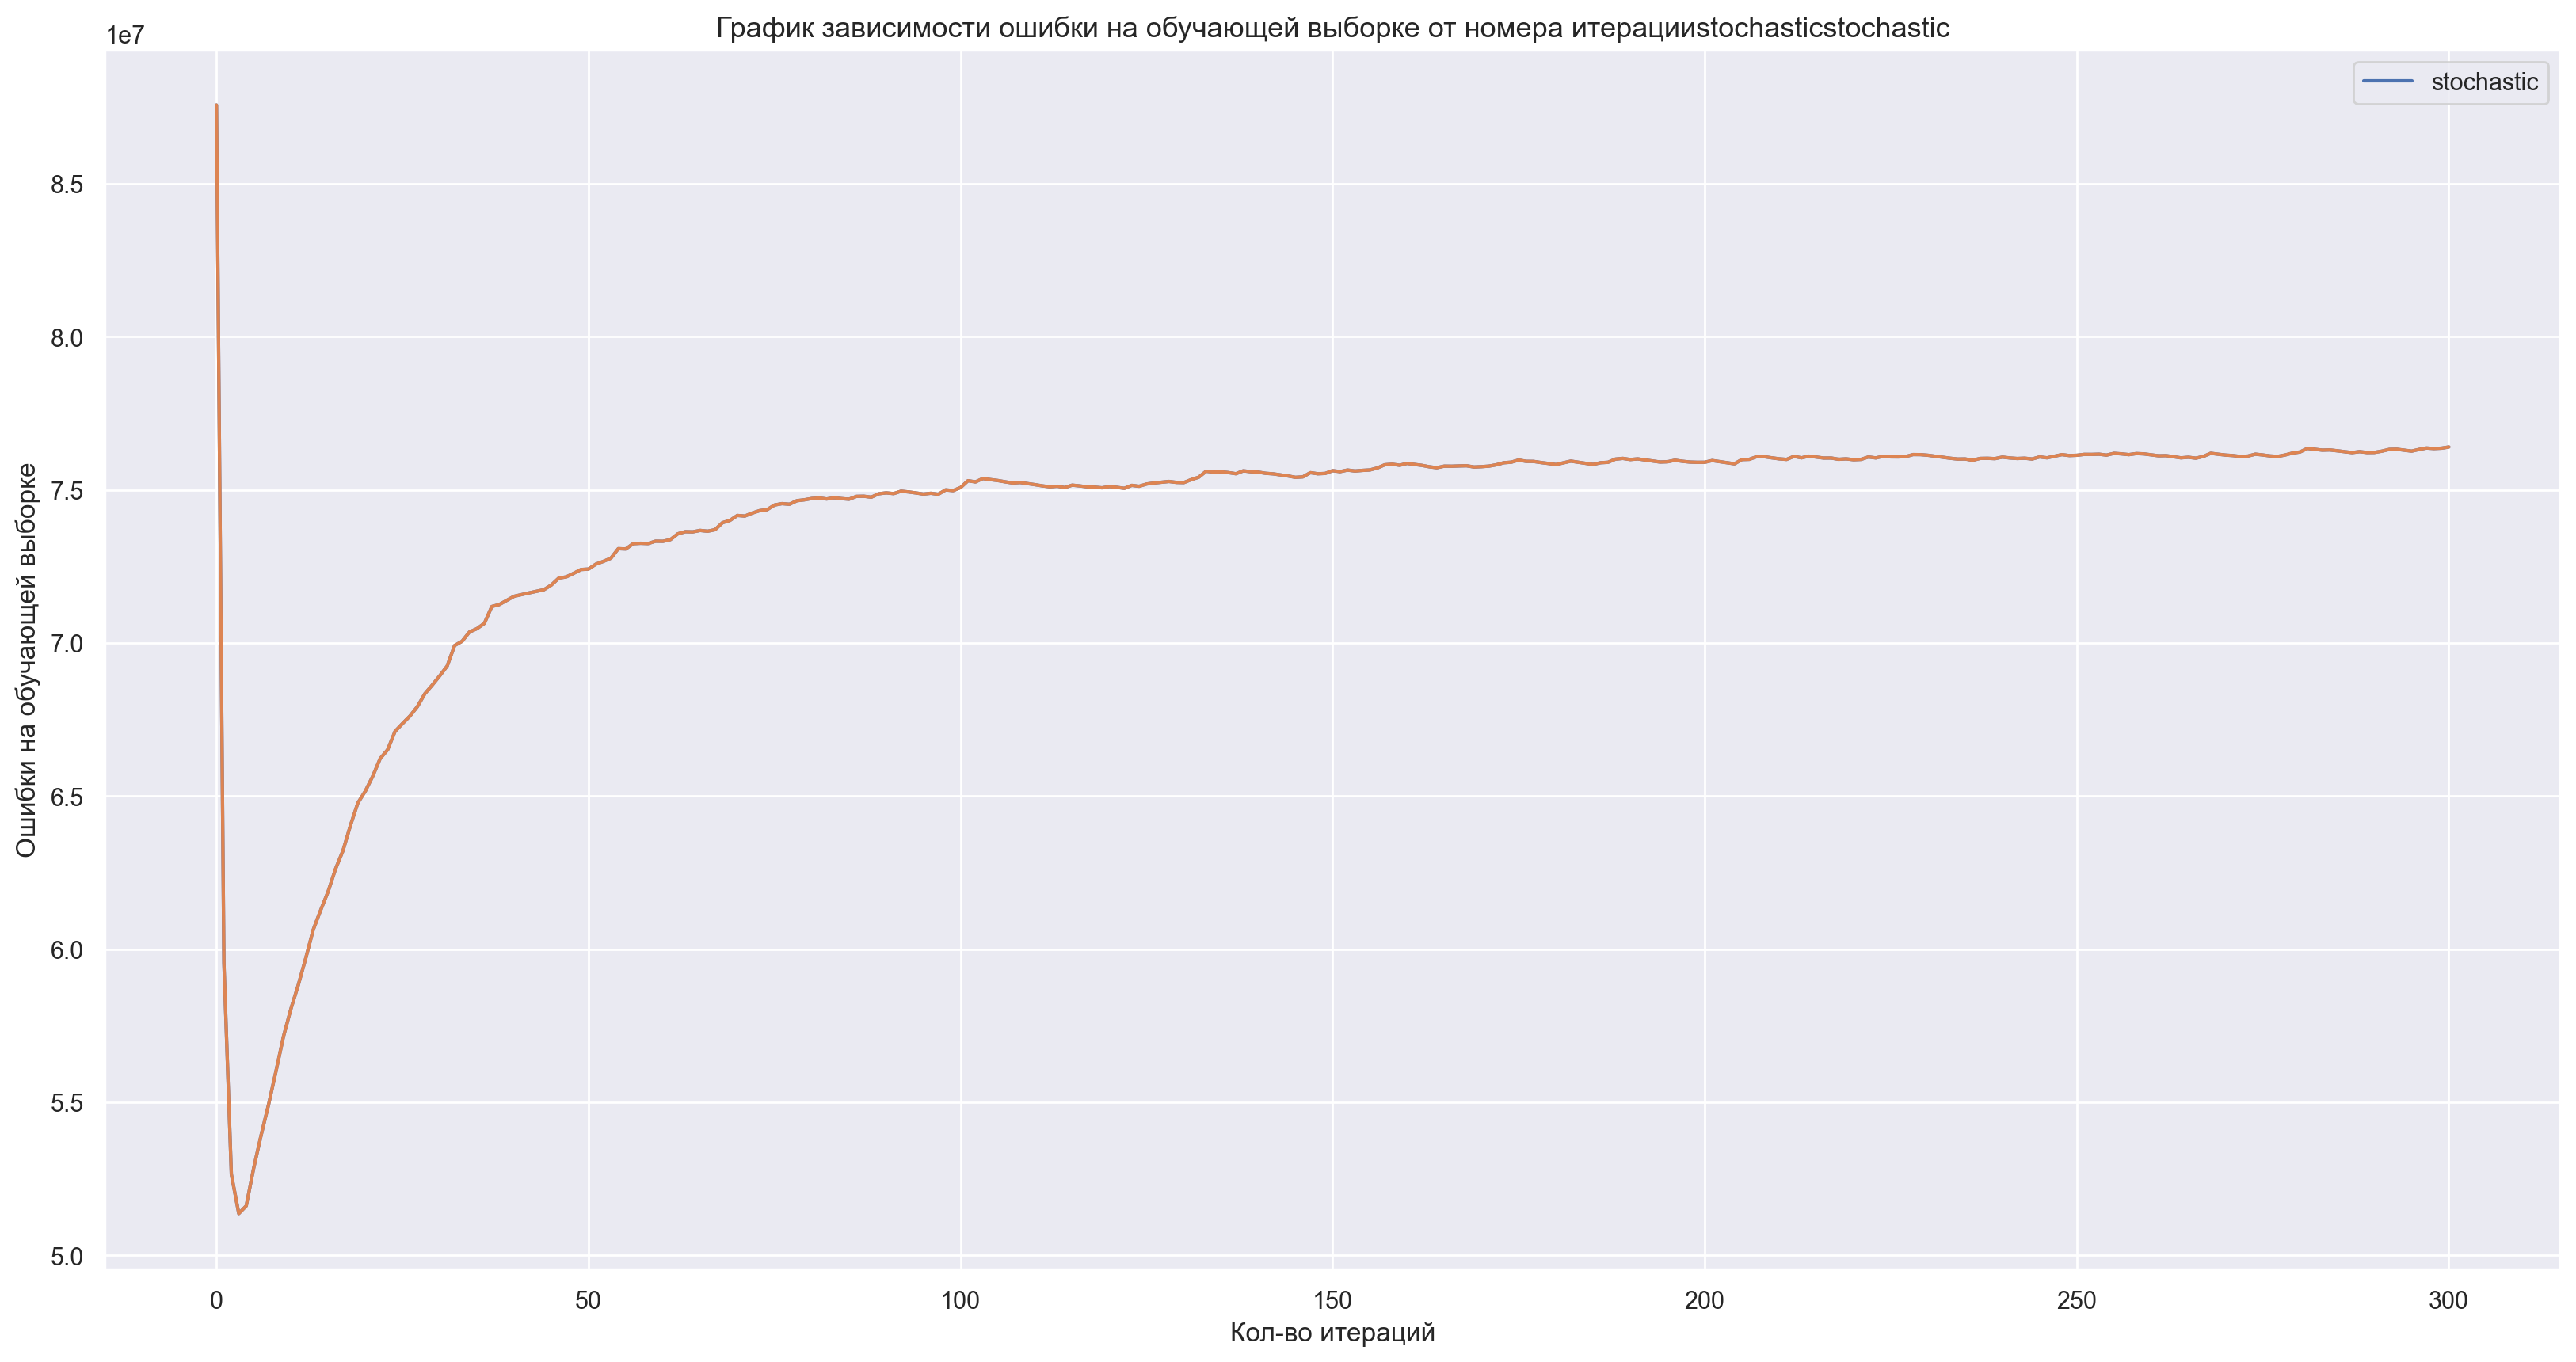

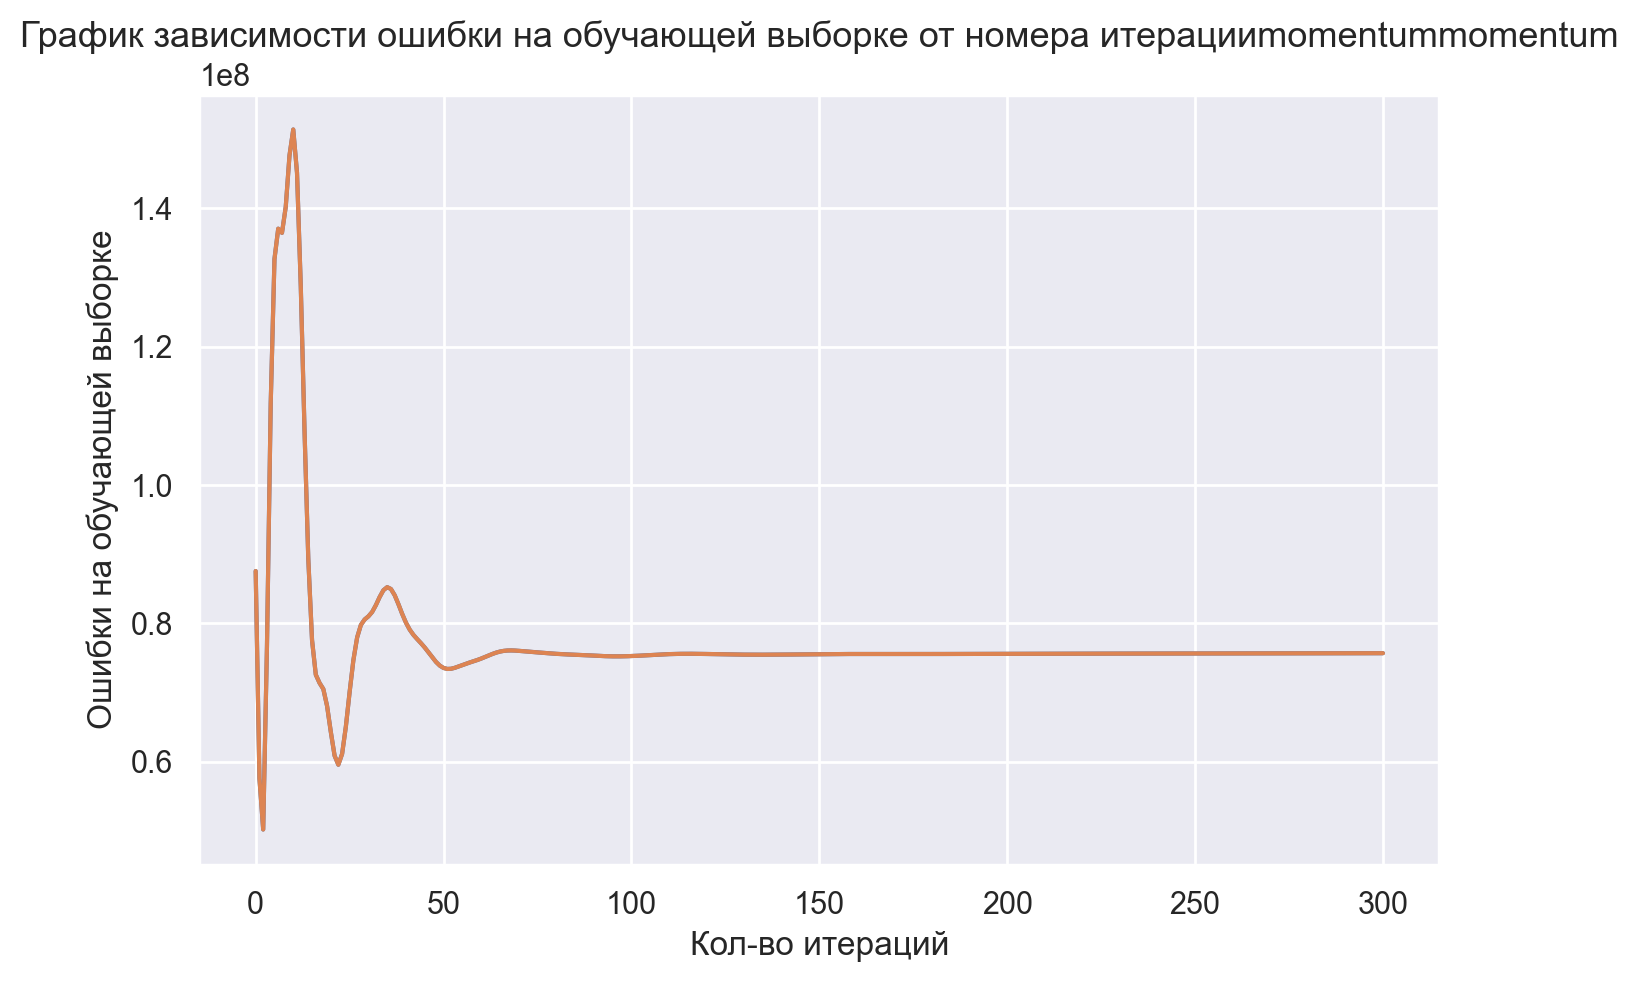

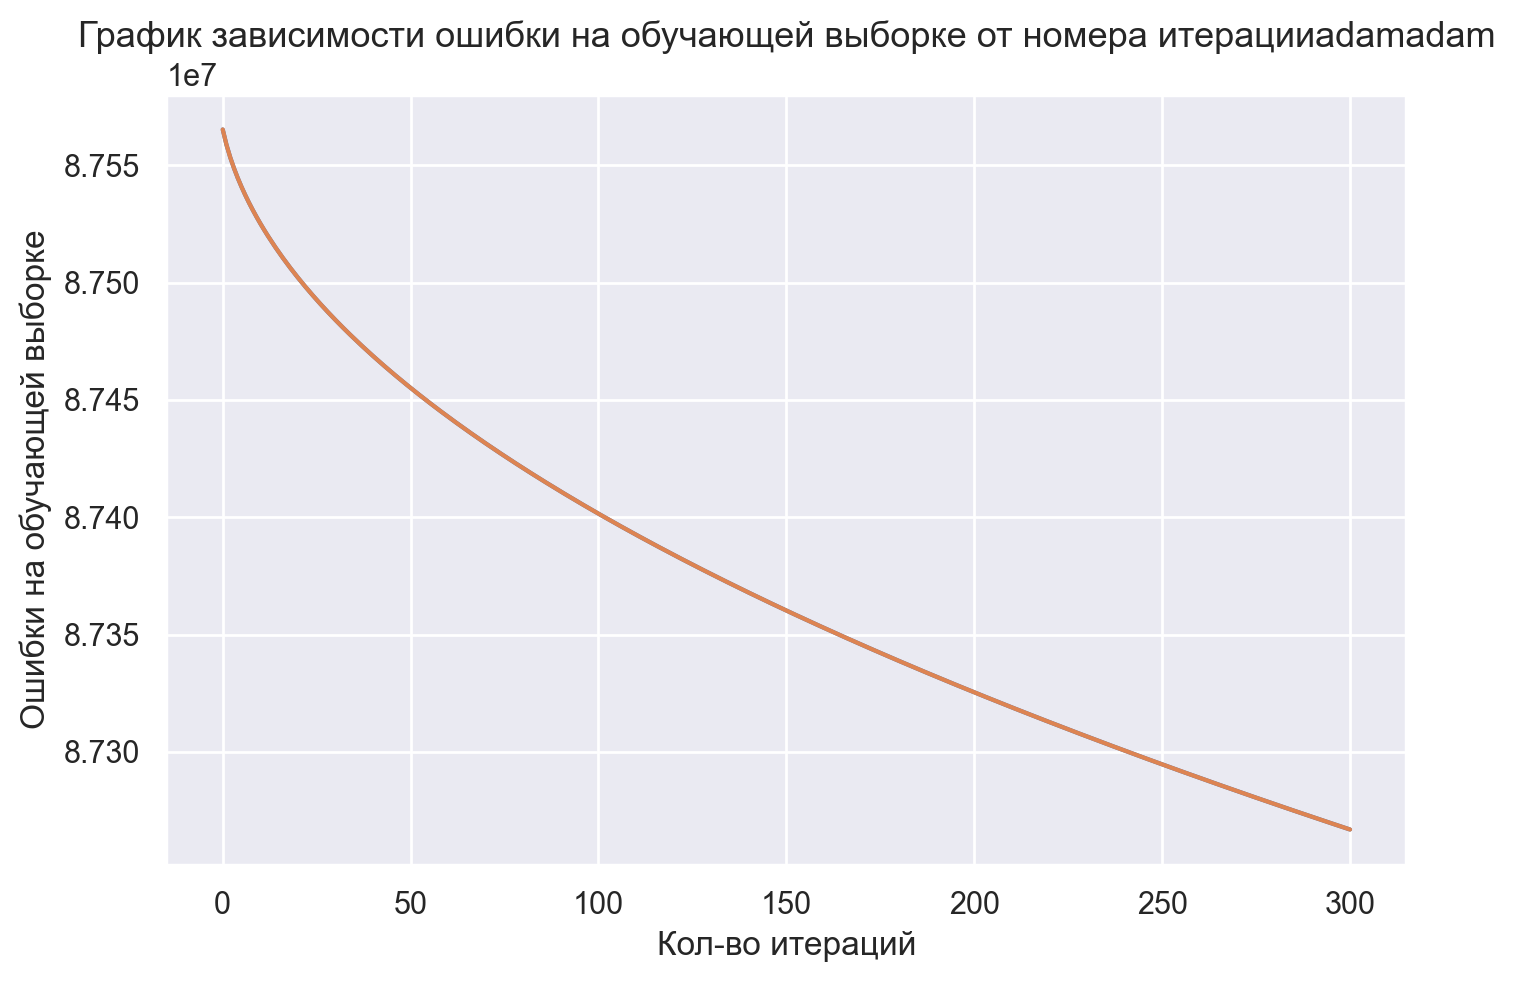

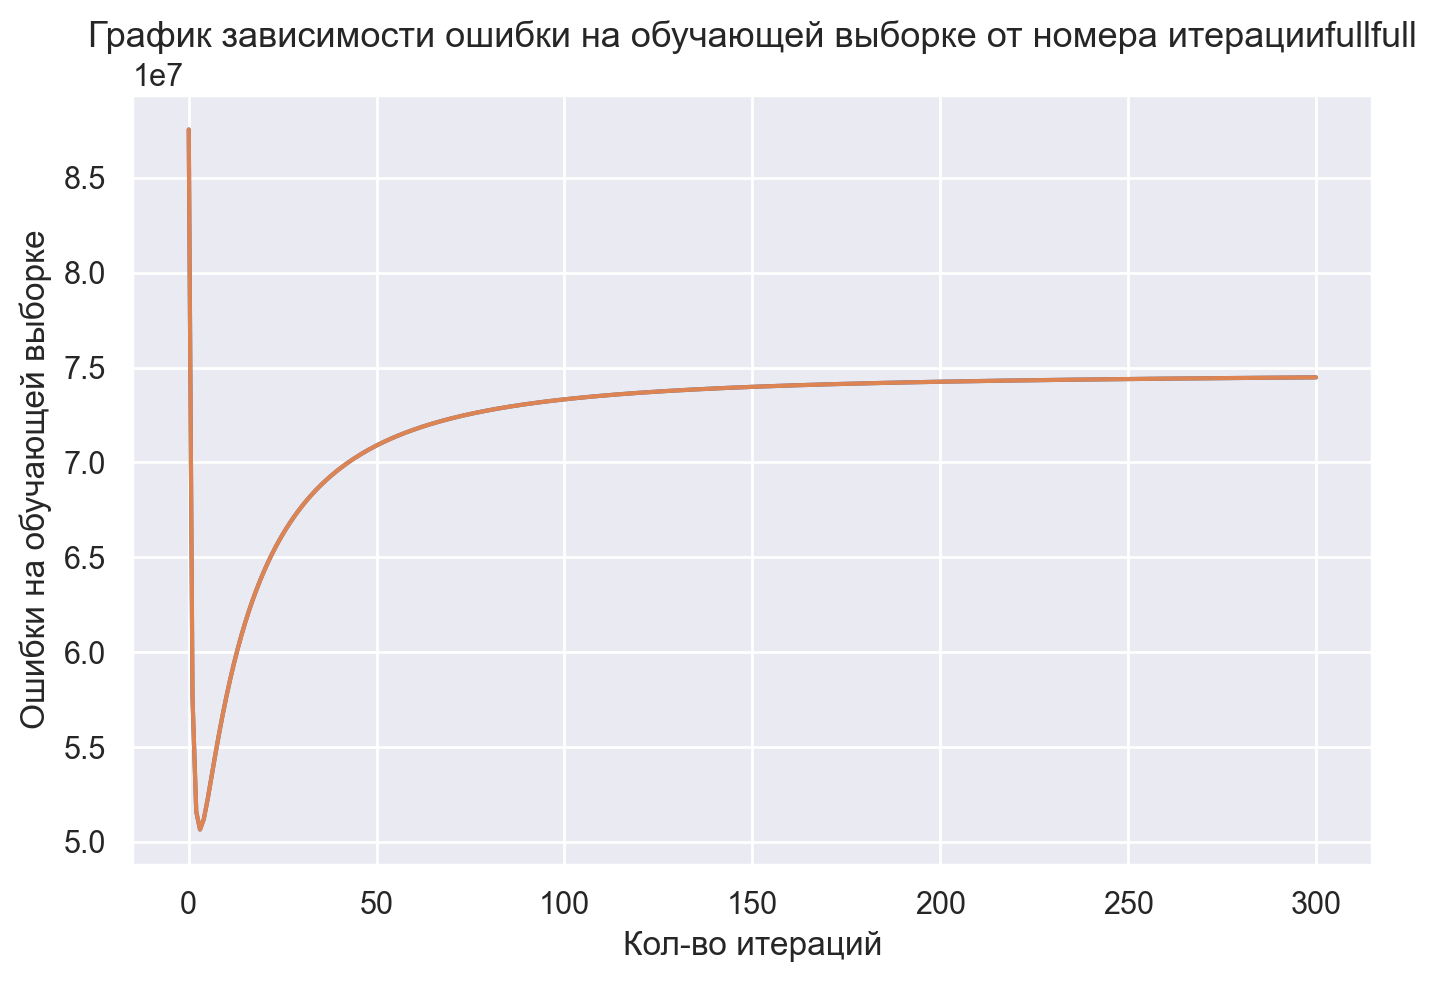

In [47]:
fig, ax = plt.subplots(figsize = (20,10))
for  nonreg,reg in zip(loss_histiries_re.items(),loss_histiries_re.items()):
    name,line = nonreg
    name_reg,line_reg = reg
    plt.plot(line,label= name )
    ax.legend()
    plt.xlabel('Кол-во итераций',fontsize = 12)
    plt.ylabel('Ошибки на обучающей выборке',fontsize = 12)
    plt.title('График зависимости ошибки на обучающей выборке от номера итерации'+name+name_reg,fontsize = 13)
    plt.plot(line_reg,label= name_reg )
    plt.show()

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: